<a href="https://colab.research.google.com/github/apurva-shrivastava/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - *Cardiovascular Risk Prediction*



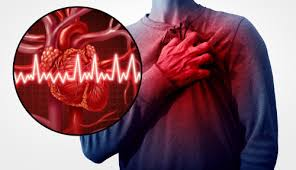

##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Heart disease refers to various types of conditions that can affect heart function.

These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural defects that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths.
Over three quarters of these deaths took place in low- and middle-income countries.

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.The dataset provides the patients’ information. It includes  3390 records and 17 attributes. Variables Each attribute is a potential risk factor. There are both **demographic**, **behavioral**, and **medical** risk factors.





# **GitHub Link -**

https://github.com/apurva-shrivastava/Cardiovascular-Risk-Prediction

# **Problem Statement**


**The Problem statment is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt#For visualizations
import itertools
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler#for Scalling feature datas
from sklearn.impute import KNNImputer, SimpleImputer#for outlier handling
# Importing libraries for modelling and evaluation
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split#For train and test dataset splitting
from imblearn.over_sampling import SMOTE#for oversampling in case of class imbalance
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#for model explainability
import lime
import lime.lime_tabular


### Dataset Loading

In [ ]:
#mouting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')


### Dataset First View

In [ ]:
# Dataset First Look
#first five records
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
#last 5 records
data.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 3390 rows and 17 columns.


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Their are {sum(data.duplicated())} duplicated values in dataset.")

Their are 0 duplicated values in dataset.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
for column in data.columns.to_list():
  print(f"There are {sum(data[column].isna())} null values in column {column}.")


There are 0 null values in column id.
There are 0 null values in column age.
There are 87 null values in column education.
There are 0 null values in column sex.
There are 0 null values in column is_smoking.
There are 22 null values in column cigsPerDay.
There are 44 null values in column BPMeds.
There are 0 null values in column prevalentStroke.
There are 0 null values in column prevalentHyp.
There are 0 null values in column diabetes.
There are 38 null values in column totChol.
There are 0 null values in column sysBP.
There are 0 null values in column diaBP.
There are 14 null values in column BMI.
There are 1 null values in column heartRate.
There are 304 null values in column glucose.
There are 0 null values in column TenYearCHD.


<Axes: >

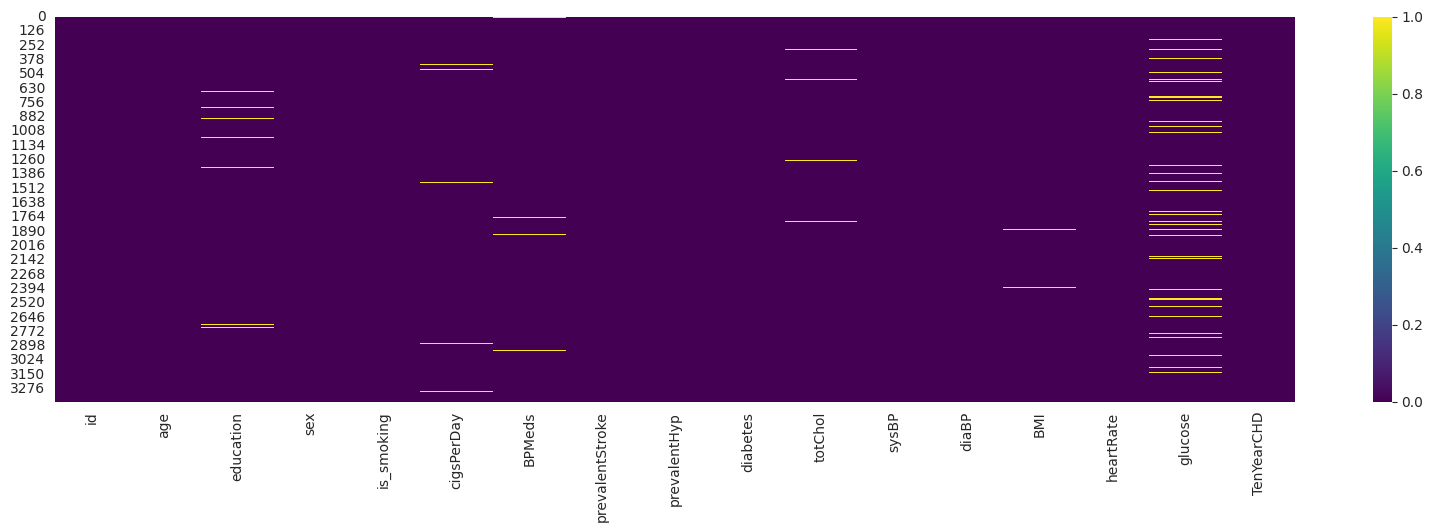

In [ ]:
# Visualizing the missing values
fig = plt.figure(figsize=(20,5))
sns.heatmap(data.isna(),cmap="viridis")


### What did you know about your dataset?

* The dataset has 3390 rows and 17 columns.

* The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

* The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

* Here the target feature is 'TenYearCHD'.

* There are 87 null values in column education.
* There are 22 null values in column cigsPerDay.
* There are 44 null values in column BPMeds.
* There are 38 null values in column totChol.
* There are 14 null values in column BMI.
* There are 1 null values in column heartRate.
* There are 304 null values in column glucose.
* Their are 0 duplicated values in dataset.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns.to_list()

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
# Dataset Describe
data.describe(include='all').T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

### Variables Description

**Demographic:**

* **Sex:** male or female("M" or "F")

* **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

* **Education:-** Education level (discrete)[1,2,3,4]

**Behavioral:**

* **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")

* **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history):**

* **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

* **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

* **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)

* **Diabetes:** whether or not the patient had diabetes (Nominal)

**Medical(current):**

* **Tot Chol:** total cholesterol level (Continuous)

* **Sys BP:** systolic blood pressure (Continuous)

* **Dia BP:** diastolic blood pressure (Continuous)

* **BMI:** Body Mass Index (Continuous)

* **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)

* **Glucose:** glucose level (Continuous)

**Predictive variable(desired target):**

* **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) (DV)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique().sort_values()

prevalentHyp          2
diabetes              2
prevalentStroke       2
BPMeds                2
TenYearCHD            2
sex                   2
is_smoking            2
education             4
cigsPerDay           32
age                  39
heartRate            68
glucose             132
diaBP               142
sysBP               226
totChol             240
BMI                1259
id                 3390
dtype: int64

In [ ]:
#printing unique values for feasible columns
col_of_intrest=['prevalentHyp','diabetes','prevalentStroke','BPMeds','TenYearCHD','sex','is_smoking','education']
for col in col_of_intrest:
  print(f"The unique values for the column {col} are {data[col].unique()}.")

The unique values for the column prevalentHyp are [0 1].
The unique values for the column diabetes are [0 1].
The unique values for the column prevalentStroke are [0 1].
The unique values for the column BPMeds are [ 0. nan  1.].
The unique values for the column TenYearCHD are [1 0].
The unique values for the column sex are ['F' 'M'].
The unique values for the column is_smoking are ['YES' 'NO'].
The unique values for the column education are [ 2.  4.  1.  3. nan].


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Setting column 'id' as index.
data.set_index('id',inplace=True)

In [ ]:
#Since we have a lot of missing values in our data set , we'll first perform missing value imputation.

#Segregating columns into categorical and numerical having null values.
cat=['education','BPMeds']
num=['glucose','totChol','cigsPerDay','BMI','heartRate']


In [ ]:
#Using Simple imputer for categorical values.

#initialising object
simp_imputer = SimpleImputer(strategy="most_frequent")
#fitting required data
simp_imputer.fit(data[cat])
#tranformed and and added back data
data[cat]= simp_imputer.transform(data[cat])

In [ ]:
#Using Knn imputer for numerical values.

#initialising object
knn_imputer= KNNImputer(n_neighbors=5)
#fitting required data
knn_imputer.fit(data[num])
#tranformed and and added back data
data[num]= knn_imputer.transform(data[num])

In [ ]:
#Checking missing values and finding it to be sorted.
data.isna().sum().sort_values(ascending=False)

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#creating copy of dataset and coverting binary numeric values(0,1)
#into actual strings for easy data visualization and plots.

data_visual=data.copy()

In [ ]:
data_visual['education'].replace({1:'level-1',2:'level-2',3:'level-3',4:'level-4'},inplace=True)
data_visual['TenYearCHD'].replace({0:'No Risk of CHD',1:'Risk of CHD'},inplace=True)
data_visual['prevalentHyp'].replace({0:'No hypertension before',1:'had hypertension'},inplace=True)
data_visual['prevalentStroke'].replace({0:'No History of Stroke',1:'Had Stroke'},inplace=True)
data_visual['BPMeds'].replace({0:'Not Taking BP Medicine',1:'Taking BP Medicine'},inplace=True)
data_visual['diabetes'].replace({0:'Not Having diabetes',1:'Having diabetes'},inplace=True)
data_visual['sex'].replace({'F':'Females','M':'Males'},inplace=True)

### What all manipulations have you done and insights you found?

* we set column 'id' as index.

* Since we have a lot of missing values in our data set , we performed missing value imputation.

* For missing value imputation we segregated columns into categorical and numerical having null values.

* We used **Simple imputer** for categorical values.

* We used Used **Knn imputer** for numerical values.

* we created copy of dataset and coverting binary numeric values(0,1) into actual strings for easy data visualization and plots.

* We also performed categorical encoding ,outliers handling using IOR method, data scaling and feature selection further as we progressed.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##**Analysing relationship between each categorical feature with respect to each other and gathering useful insights !**

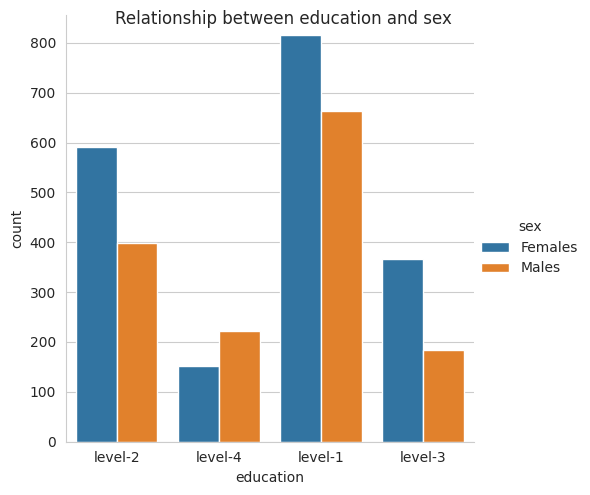

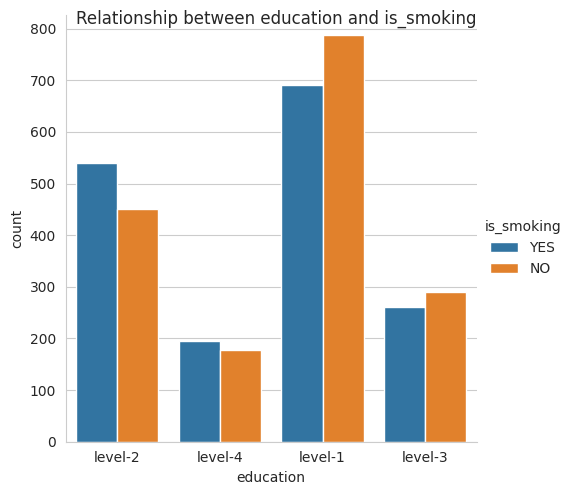

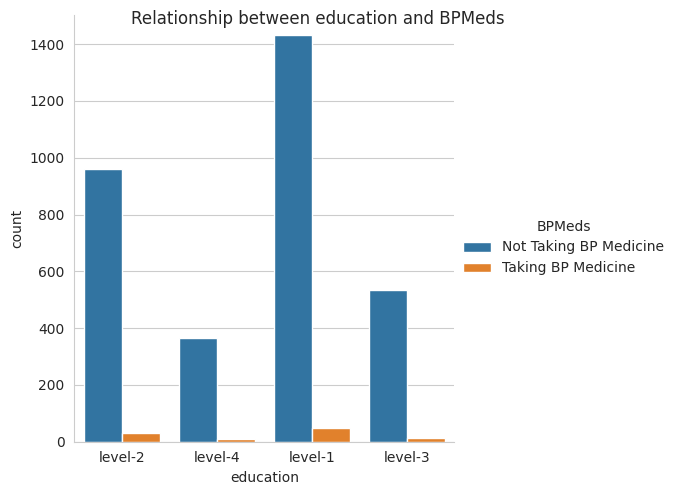

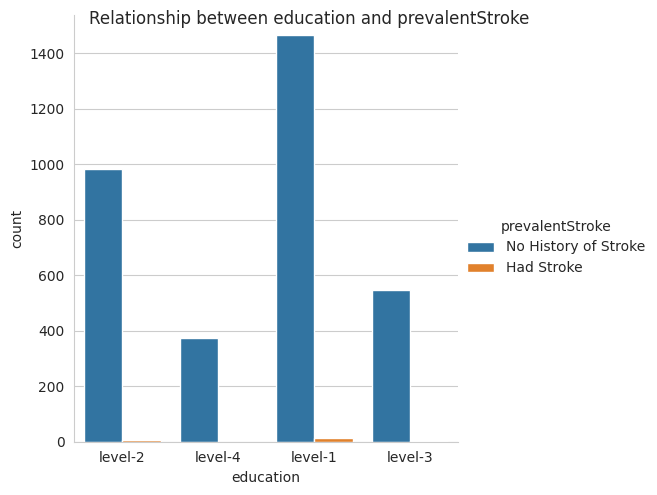

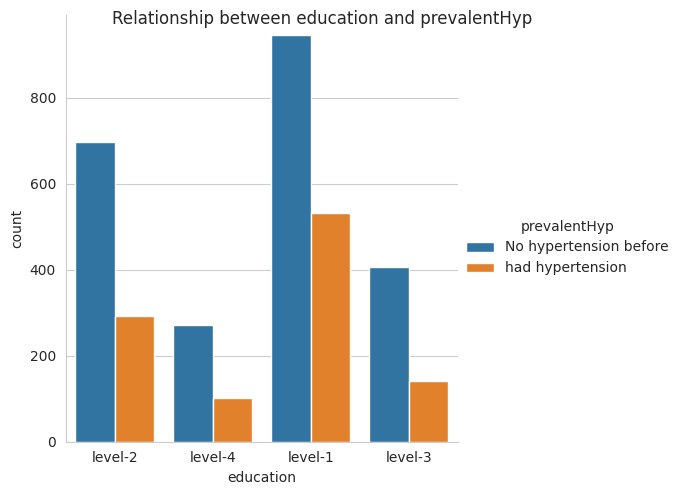

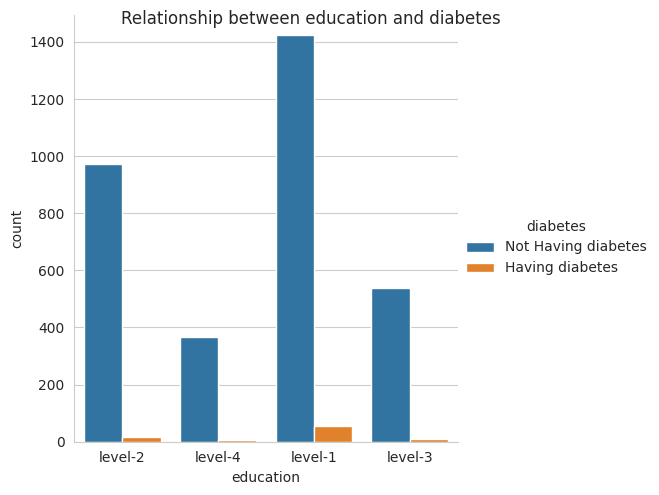

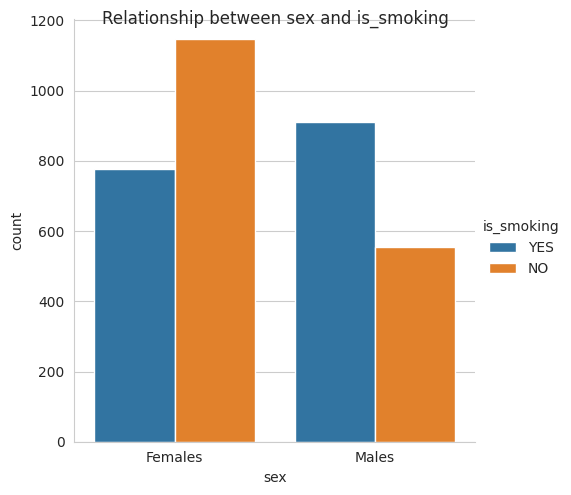

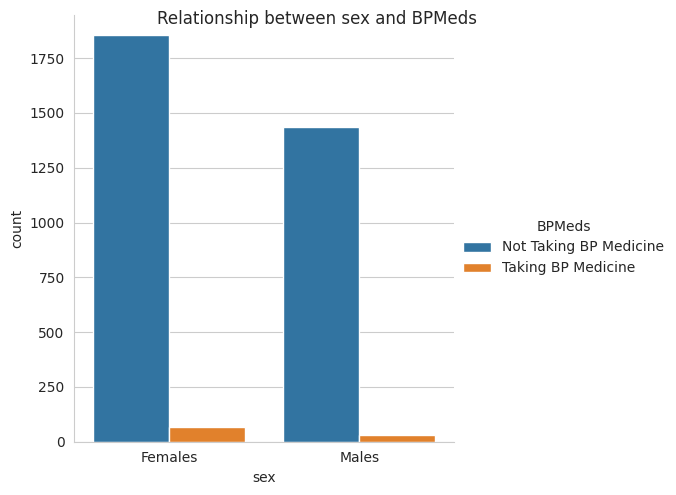

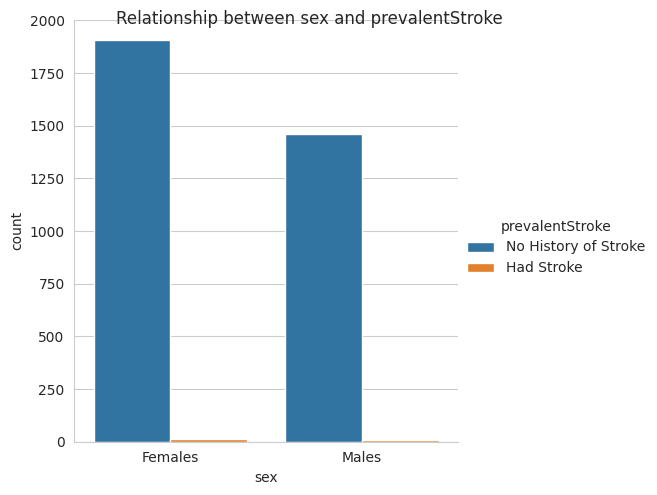

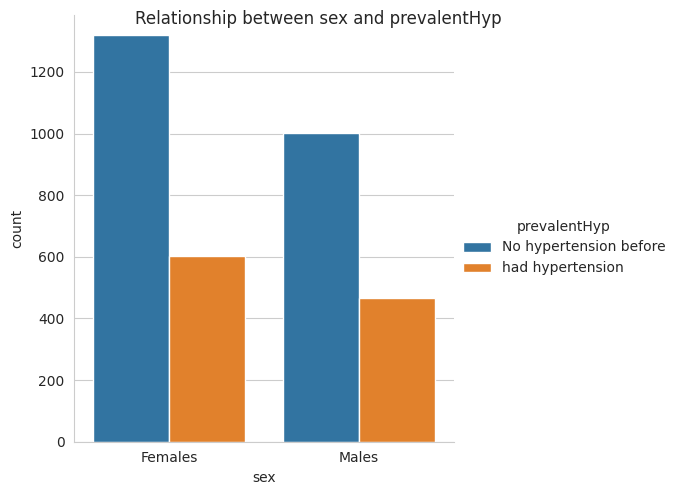

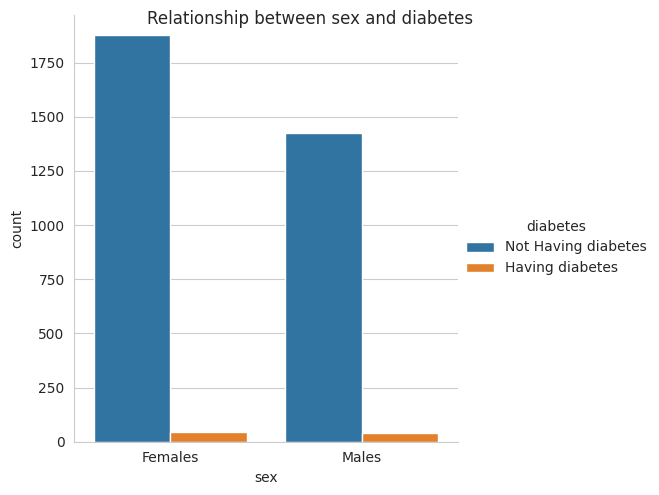

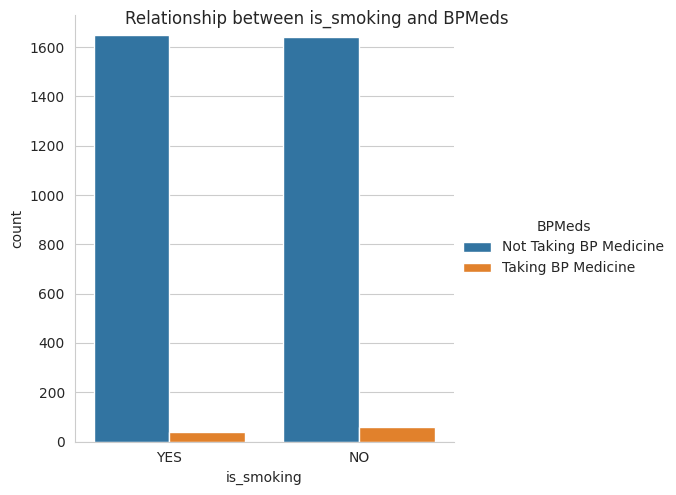

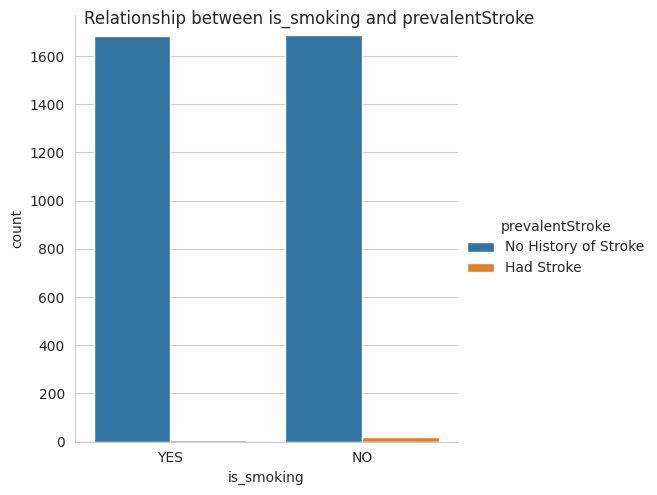

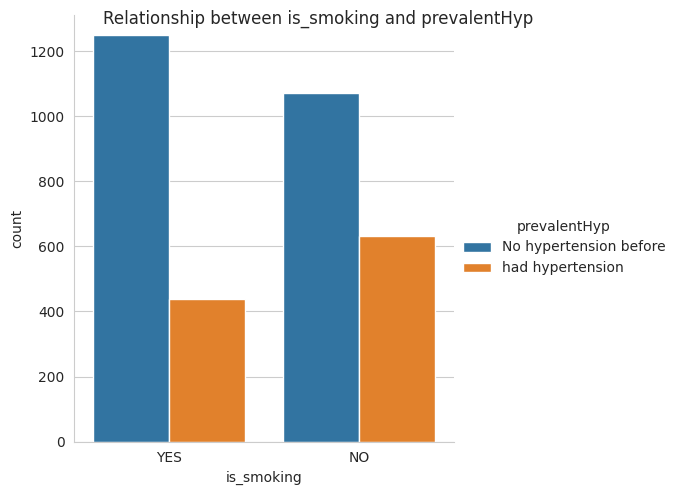

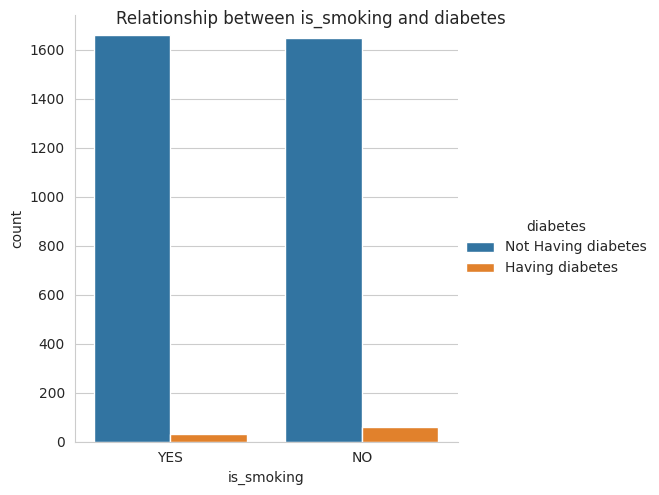

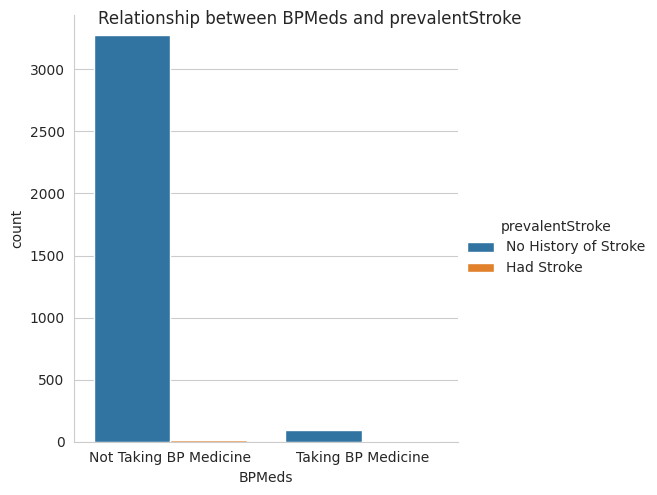

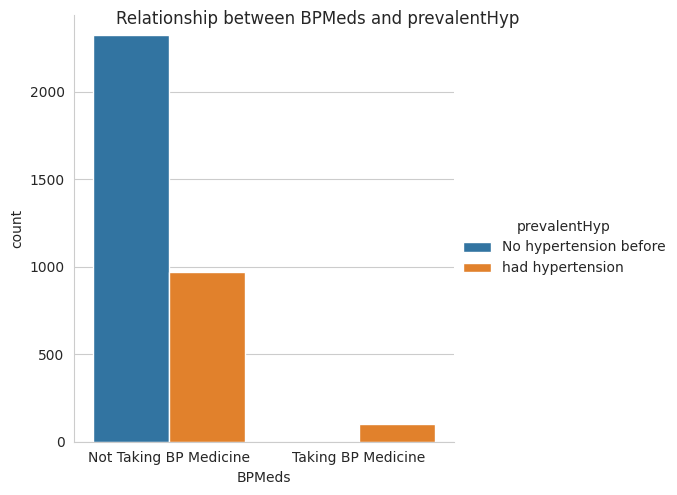

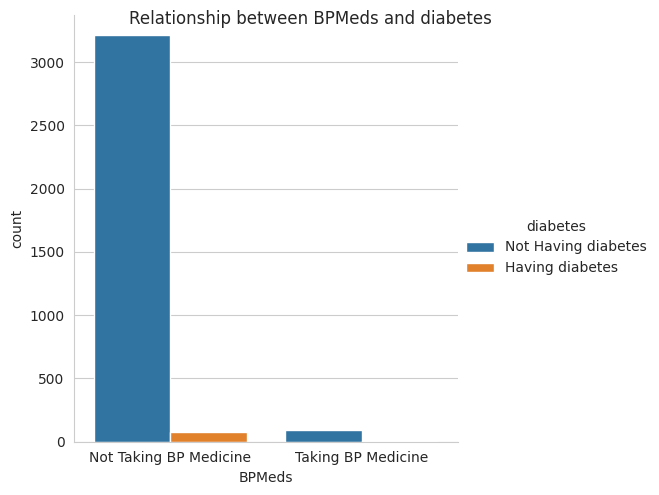

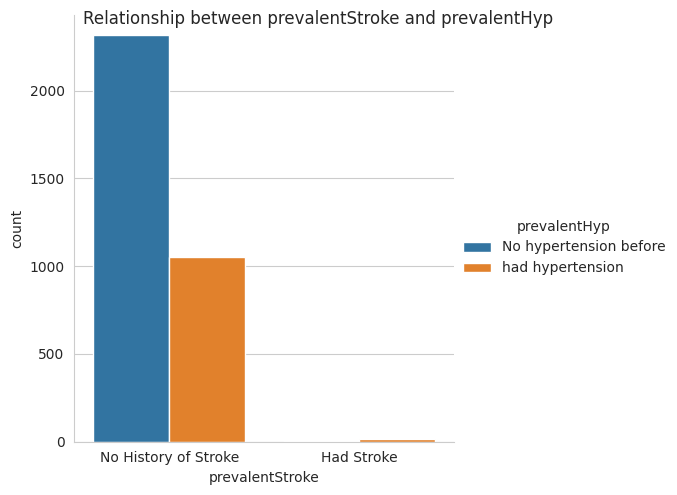

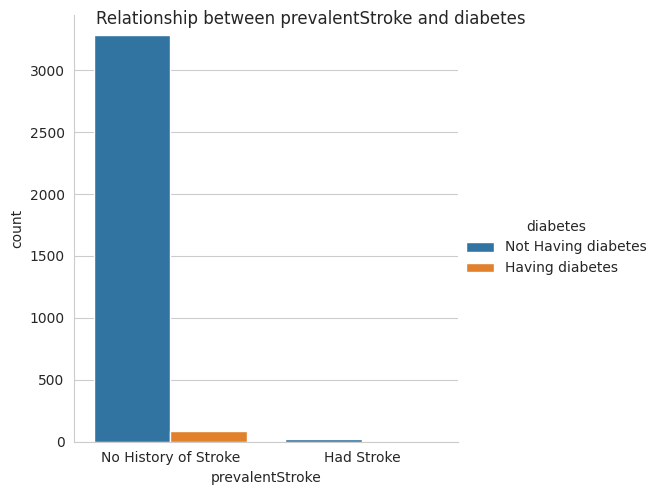

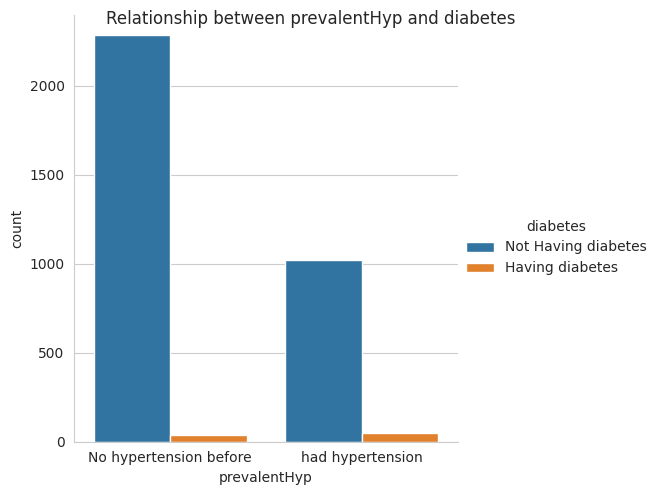

In [ ]:
# Chart - 1 visualization code

# create an empty set to keep track of the pairs of variables that have already been plotted
plotted_pairs_cat = set()

# loop through each categorical variable in the DataFrame
for col1 in data_visual.select_dtypes(include=['object']):
    # loop through each other categorical variable in the DataFrame
    for col2 in data_visual.select_dtypes(include=['object']):
        # check if the pair of variables has already been plotted
        if (col1, col2) not in plotted_pairs_cat and (col2, col1) not in plotted_pairs_cat and col1!=col2 and col1!='TenYearCHD' and col2!='TenYearCHD':
            # if the pair of variables has not been plotted, create a count plot of the two variables
            plot = sns.catplot(x=col1, hue=col2, kind="count", data=data_visual)
            plot.fig.suptitle(f"Relationship between {col1} and {col2}")
            # add the pair of variables to the set of plotted pairs
            plotted_pairs_cat.add((col1, col2))




##### 1. Why did you pick the specific chart?

A count plot is a type of data visualization that displays the number of occurrences of each category in a categorical variable. It is a simple bar chart that shows the count or frequency of each unique value in a dataset.

Count plots are commonly used in data analysis to quickly identify the most common categories in a dataset and to compare the frequency of different categories. They can be easily created using libraries such as seaborn or matplotlib in Python.

##### 2. What is/are the insight(s) found from the chart?


* People attaining education 1 is high followed by 2,3 and 4.

* Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.

* Around 50% of people in all education types tend to be smokers.

* Around 30% of people in all education types tend to have hypertension.

* Males have higher chance to be a smoker.

* Non-smokers tend to have a bit higher chance(37%) of hypertension issues compared to smokers(25%).

* People on bp medication tend to have hypertension issues as well.

* People on bp medication tend to have a bit higher chance to be diabetic by 9%.

* People with prevalent stroke tend to have a higher chance(72%) of hypertension issues.

* People with prevalent hypertension tend to have a bit higher chance of being diabetic.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps creating a positive business impact since they tend to relate different medical factors and behavioural factors and their combined effects over health of people and ulitmately helps us to gets to the conclusion of future risk of CHD.

#### Chart - 2

##**Analysing relationship between each numerical feature with respect to each other and checking their behaviour !**

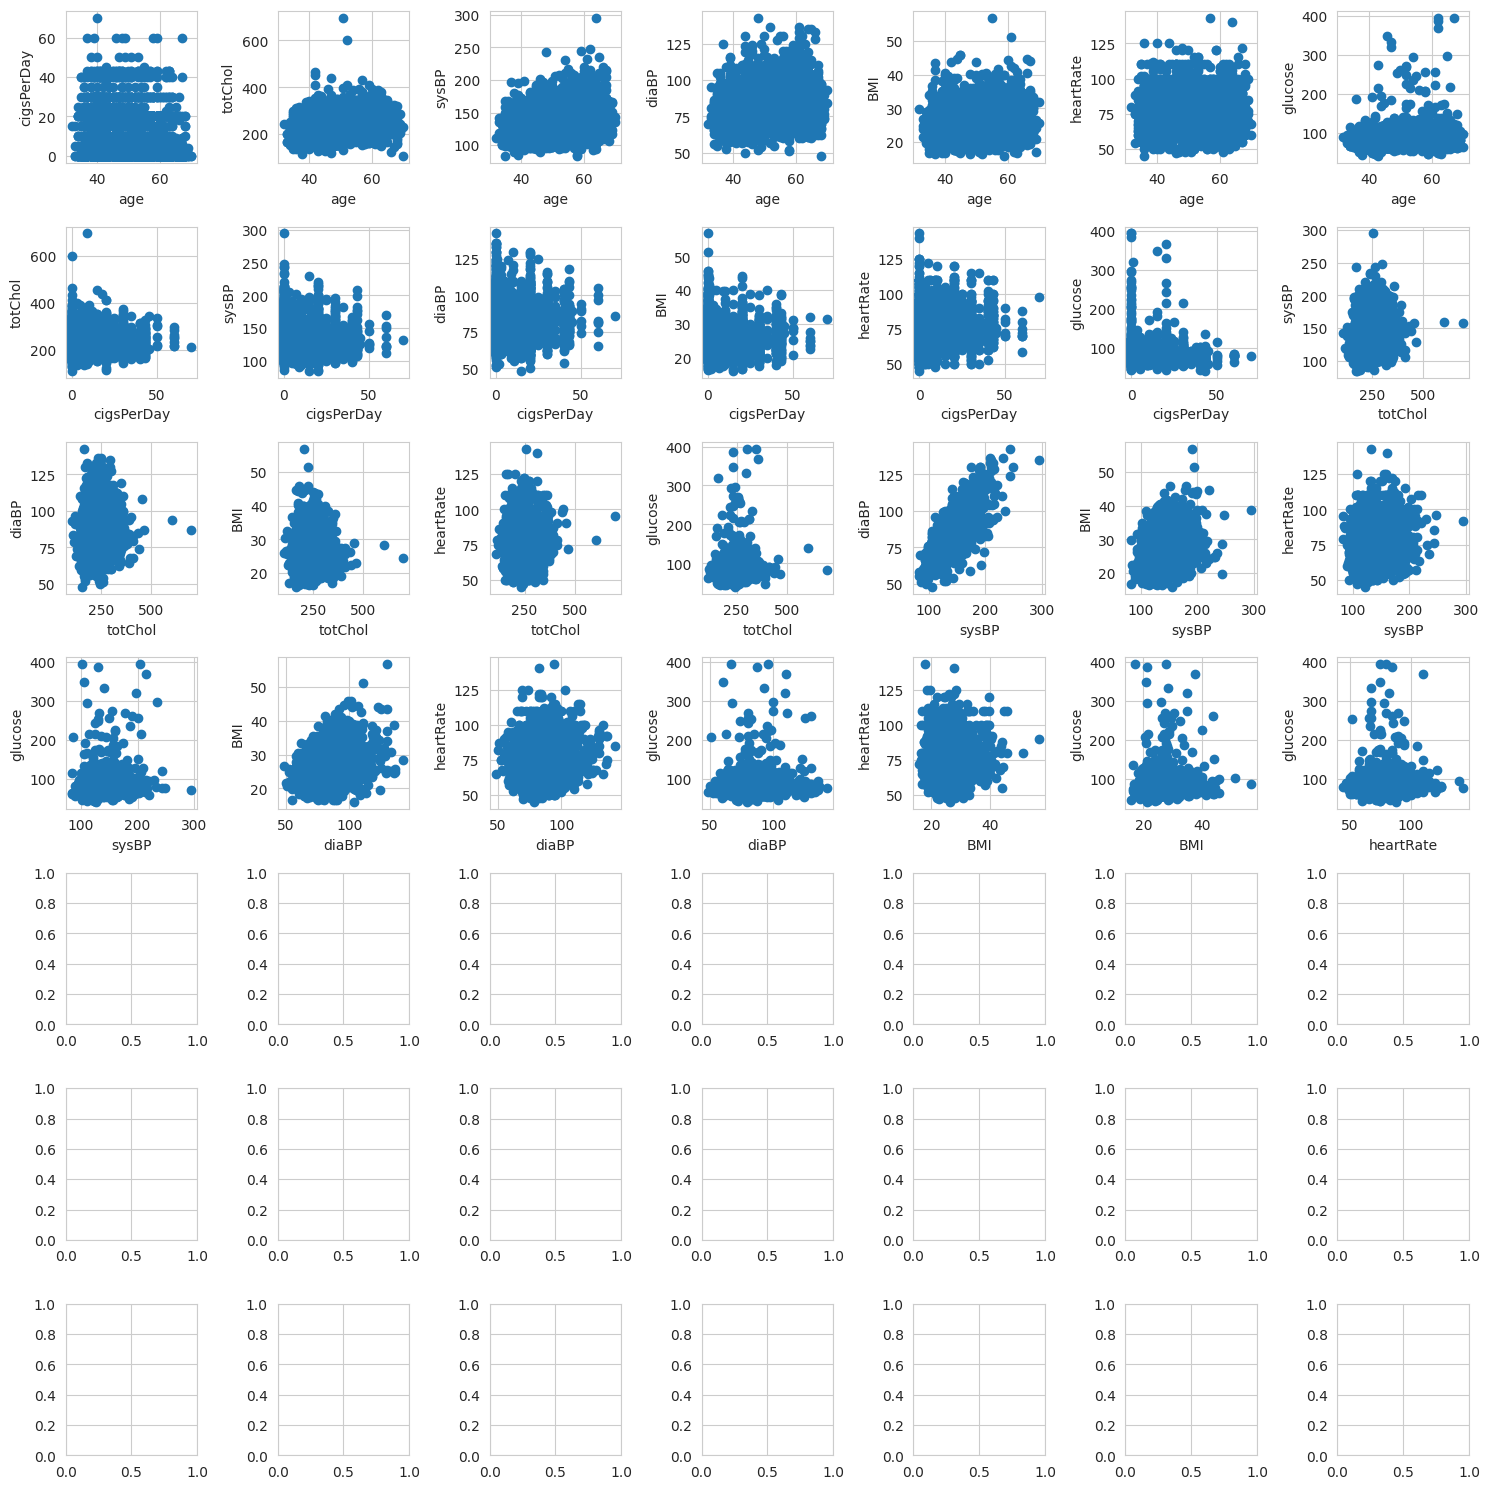

In [ ]:
# Chart - 2 visualization code

#columns of intrest
num_cols = data_visual.select_dtypes(include=['float64', 'int64'])

# Create unique scatter plots between all numerical features
fig, axs = plt.subplots(nrows=num_cols.shape[1]-1, ncols=num_cols.shape[1]-1, figsize=(15,15))
for i, (x, y) in enumerate(itertools.combinations(num_cols.columns, 2)):
    r, c = i // (num_cols.shape[1] - 1), i % (num_cols.shape[1] - 1)
    axs[r, c].scatter(num_cols[x], num_cols[y])
    axs[r, c].set_xlabel(x)
    axs[r, c].set_ylabel(y)
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that displays the relationship between two numerical variables.

It consists of a set of points, each representing a pair of values for the two variables.

Scatter plots are often used to identify patterns and relationships between variables, such as whether they are positively or negatively correlated, whether there is a linear or non-linear relationship, or whether there are any outliers or clusters in the data.



##### 2. What is/are the insight(s) found from the chart?

The variables like sys BP and dia BP follows a linear trend and also also leads to increase in glucose level to an extent.

The dia BP is however correlated to BMI because with increase in di BP , we could figure out an increasing trend in BMI also .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps us indentify and check whether the medical/ behavioural/demographical factors responsible for future risk of CHD are actully impacted by each other or not.


#### Chart - 3

##**Analysing relationship between each categorical feature with respect to target variable and plotting insights !**

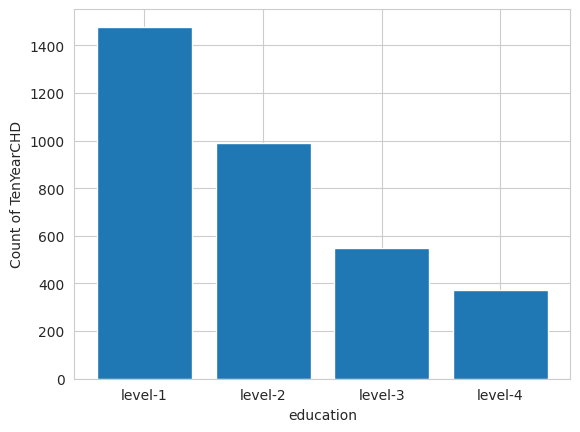

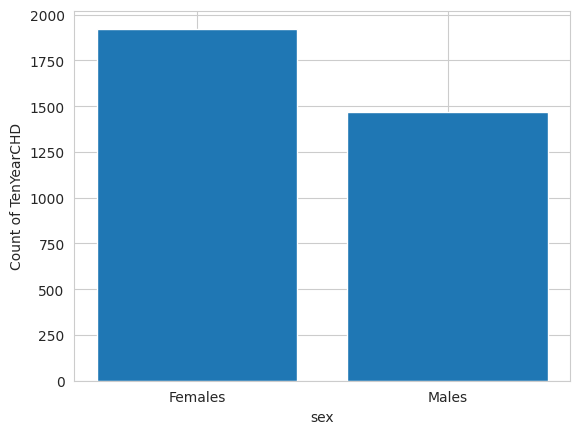

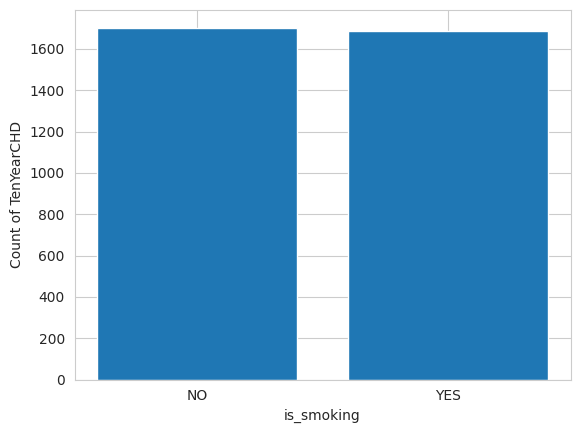

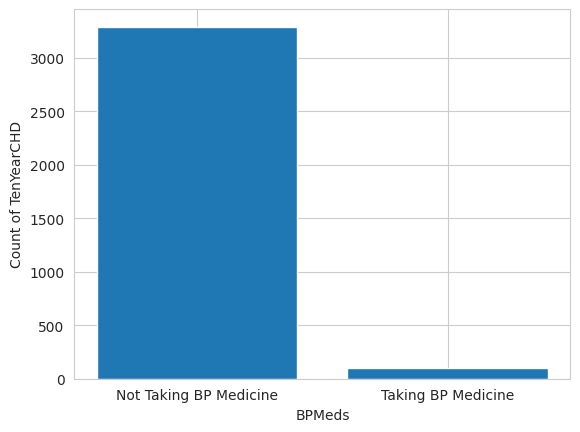

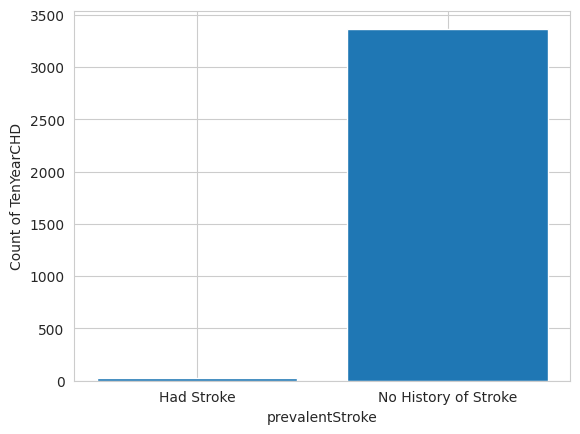

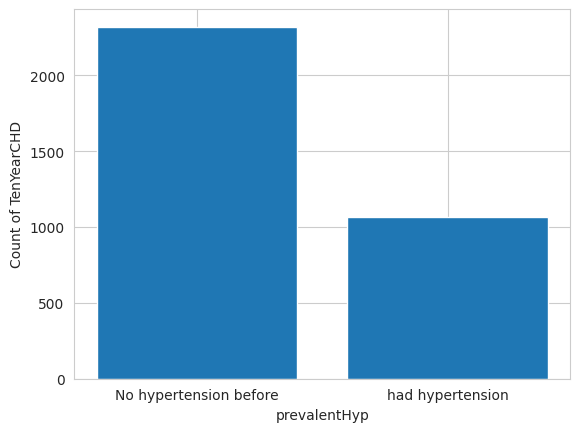

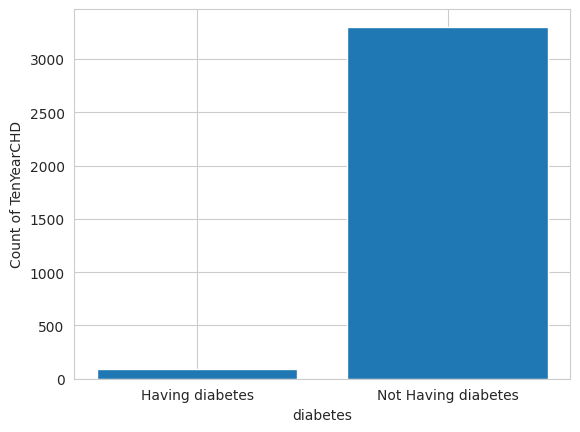

In [ ]:
# Chart - 3 visualization code
cat_vars = ["education", "sex", "is_smoking",'BPMeds','prevalentStroke','prevalentHyp','diabetes']
target_var = 'TenYearCHD'

# Create a bar plot for each categorical variable
for cat_var in cat_vars:
    # Group the data by the categorical variable and count the target variable occurrences
    grouped = data_visual[[cat_var, target_var]].groupby(cat_var).count().reset_index()

    # Create a bar plot of the target variable occurrences by the categorical variable
    fig, ax = plt.subplots()
    ax.bar(grouped[cat_var], grouped[target_var])
    ax.set_xlabel(cat_var)
    ax.set_ylabel("Count of " + target_var)
    plt.show()

##### 1. Why did you pick the specific chart?

We selected bar graph for display of this information because they are a popular and effective way to visually communicate data to a broad audience because they are easy to read and interpret.

Bar graphs are useful for displaying categorical data or numerical data with discrete values.

They are commonly used to show the frequency or proportion of different categories or to compare the magnitude of different data points.

##### 2. What is/are the insight(s) found from the chart?

Males have a bit higher chance of CHD  compared to females.

Smokers have a bit higher chance of CHD compared to non smokers.

People with  BP medication,  prevalent stroke,  prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights directly have an impact over our target decision that is risk of future CHD and helps us figure out that which factors might be more increase risk of future CHD and which might not.


#### Chart - 4

##**Analysing relationship between each numerical feature with respect to target variable and plotting insights!**

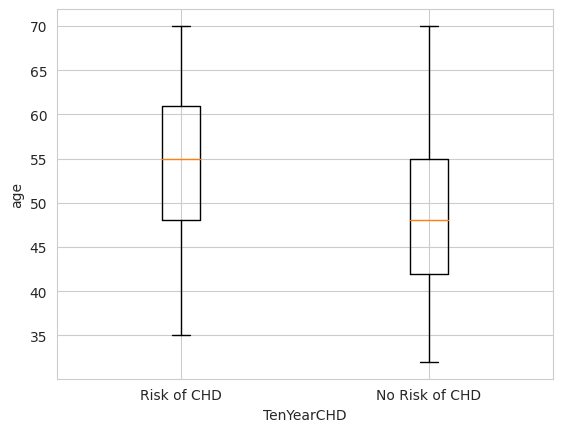

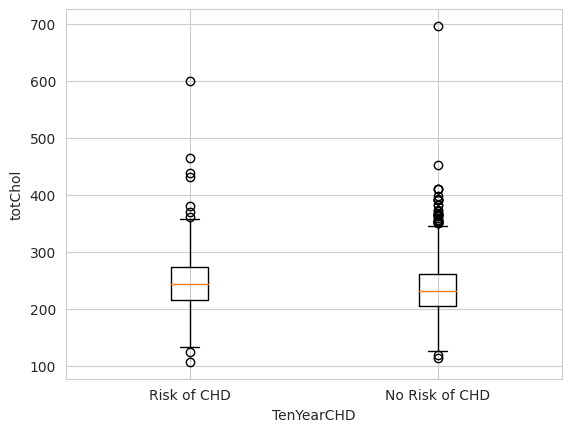

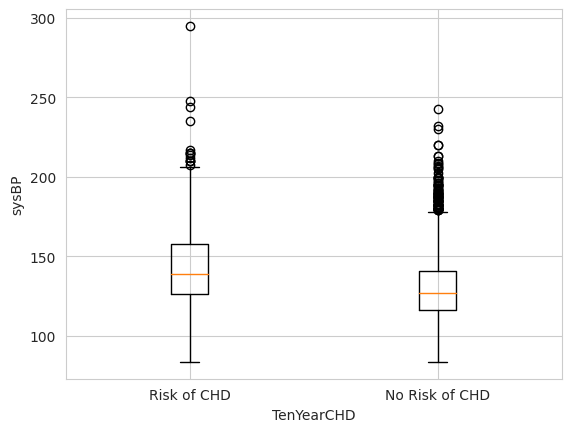

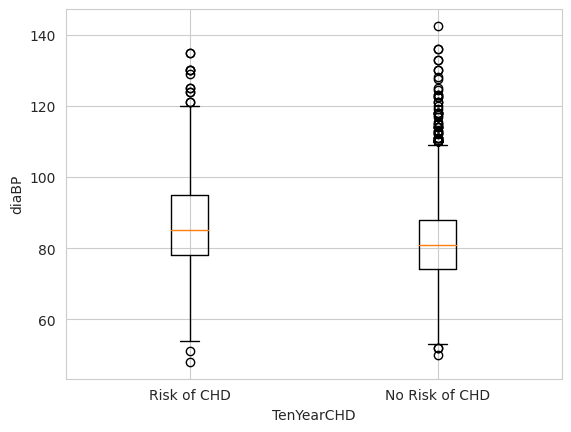

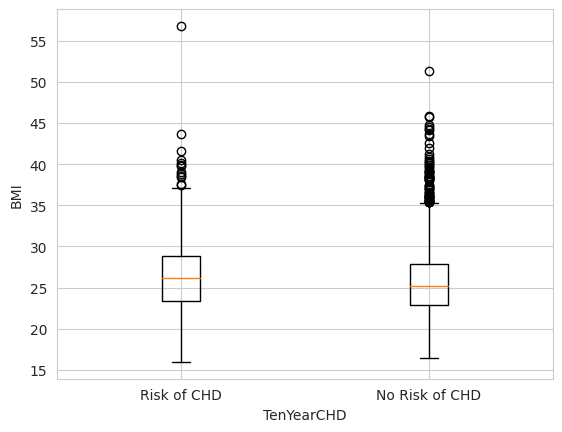

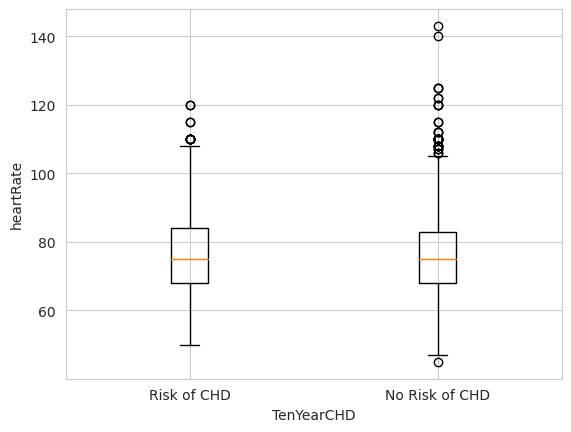

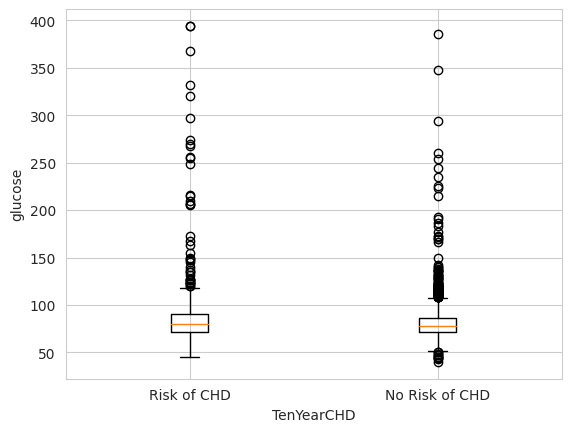

In [ ]:
# Chart - 4 visualization code
num_vars = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']
target_var = "TenYearCHD"

# Create a box plot for each numerical variable
for num_var in num_vars:
    # Create a box plot of the numerical variable by the target categorical variable
    fig, ax = plt.subplots()
    ax.boxplot([data_visual[data_visual[target_var] == cat][num_var] for cat in data_visual[target_var].unique()])
    ax.set_xticklabels(data_visual[target_var].unique())
    ax.set_xlabel(target_var)
    ax.set_ylabel(num_var)
    plt.show()

##### 1. Why did you pick the specific chart?

We selected box plots for display of this information because it is a type of data visualization that provides a graphical summary of a dataset's distribution.

The plot displays the range, median, and quartiles of the dataset in a compact manner.

The box in the plot represents the interquartile range (IQR), which is the range between the first and third quartiles (the 25th and 75th percentiles) of the data. The line inside the box represents the median of the dataset.

The whiskers extend from the box to the minimum and maximum values of the data that fall within 1.5 times the IQR from the edges of the box.

Any data points that fall outside the whiskers are considered outliers and are represented as individual points.

##### 2. What is/are the insight(s) found from the chart?

An increase in glucose levels, SysBp , DiaBp and age tend to have a higher chance for CHD.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps creating a positive business impact by identifying and stating that their are lot of values which arent into required range (or outliers) and need to be corrected in future.



#### Chart - 5

##**Does Educating people of different age groups at different levels lowers the risk of CHD ?**

Text(0.5, 1.0, 'The Risk of CHD based on Age and level of education about the same')

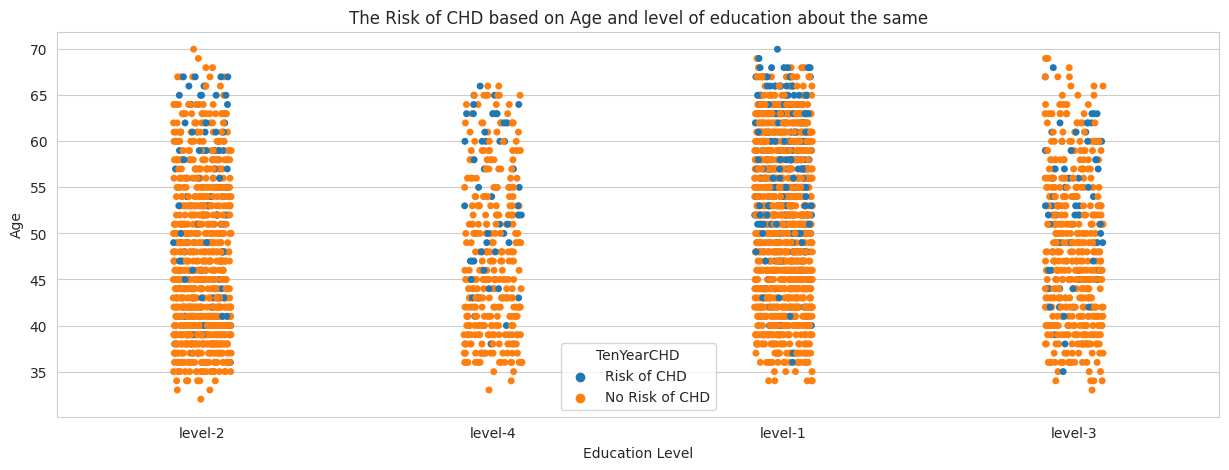

In [ ]:
# Chart - 5 visualization code

#The Risk of CHD based on Age and level of education about the same

fig = plt.figure(figsize=(15,5))
sns.stripplot(x='education', y='age',hue='TenYearCHD' ,data=data_visual)
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('The Risk of CHD based on Age and level of education about the same')

##### 1. Why did you pick the specific chart?

A strip plot is a type of data visualization that displays the distribution of a continuous variable within different categories. It works by creating a scatterplot where each data point represents an observation in the dataset and is positioned according to its value on the continuous variable. The data points are then grouped by category, with each group represented by a different color or symbol.

Strip plots can be useful for visualizing the spread of data and identifying potential outliers within each category. They are particularly useful when the dataset is small or the categories are discrete.



##### 2. What is/are the insight(s) found from the chart?

We could see more risk of CHD at level 1 of education followed by level 2 , 3 and level 4.

However as we proceed from at higher age group we see a comparitively increased blue points (which in this case reflects higher risk of CHD.)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Its good to see that most of the people at different levels of education have no risk of future CHD (indicated by orange dot).

#### Chart - 6

##**Who among men and women smokes more and ultimately have higher future risk of CHD ?**

Text(0, 0.5, 'Count of males and females and risk factor')

<Figure size 2000x2000 with 0 Axes>

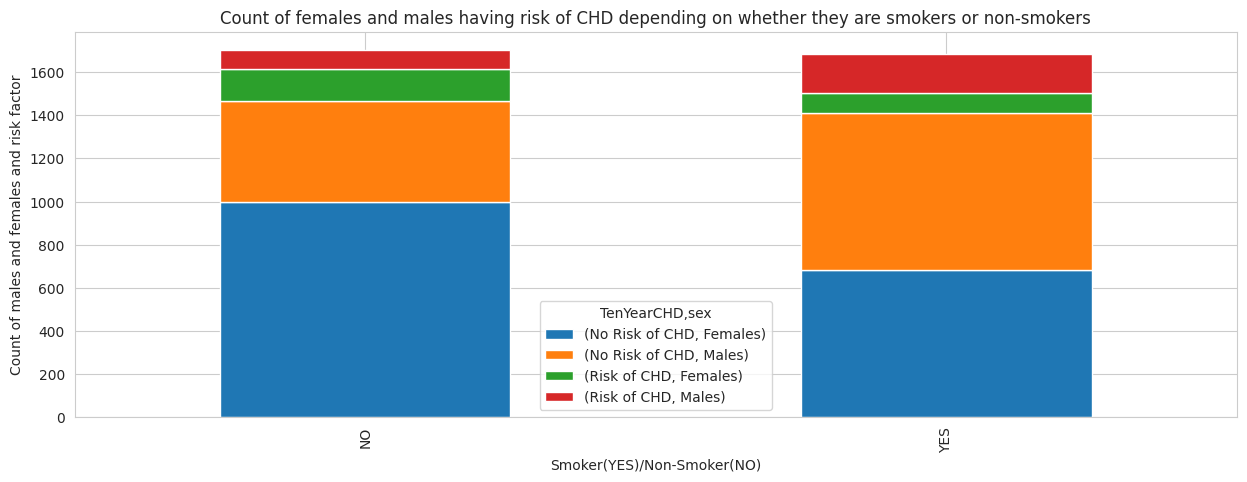

In [ ]:
# Chart - 6 visualization code

#Count of females and males having risk of CHD depending on whether they are smokers or non-smokers

cross_tab = pd.crosstab(index=data_visual['is_smoking'],columns= [data_visual['TenYearCHD'],data_visual['sex']])
fig = plt.figure(figsize=(20, 20))
cross_tab.plot(kind='bar', stacked=True,figsize=(15,5))
plt.title('Count of females and males having risk of CHD depending on whether they are smokers or non-smokers')
plt.xlabel('Smoker(YES)/Non-Smoker(NO)')
plt.ylabel('Count of males and females and risk factor')

##### 1. Why did you pick the specific chart?

We selected bar graph for display of this information because they are a popular and effective way to visually communicate data to a broad audience because they are easy to read and interpret.

Bar graphs are useful for displaying categorical data or numerical data with discrete values.

They are commonly used to show the frequency or proportion of different categories or to compare the magnitude of different data points.

##### 2. What is/are the insight(s) found from the chart?

We found that males tend to smoke as compared to females adnd ultimately males have higher risk of CHD as compared to females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We figured out an strong correlation between people smoking and having risk of CHD in terms of females and males and according to the insights gained we get an direction in which analysis need to be performed.

#### Chart - 7

##**How many people are actually taking medicine for BP given that they have high BP measures ?**

Text(0.5, 1.0, 'Distribution of people Taking/Not Taking Medicines for BP')

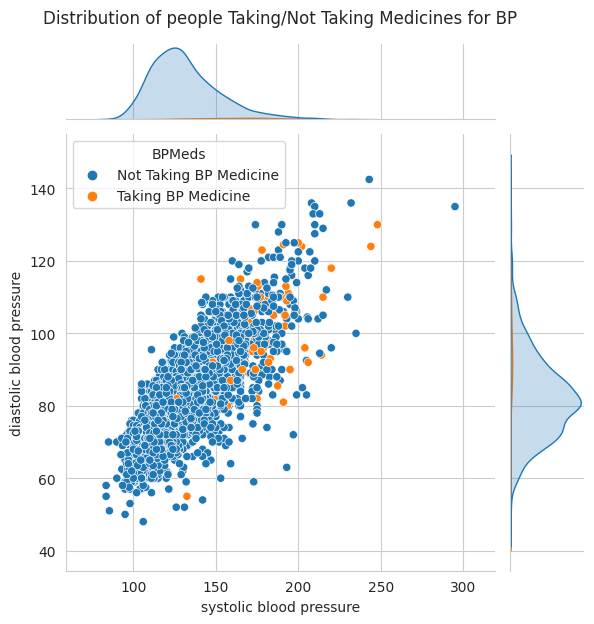

In [ ]:
# Chart - 7 visualization code

#Distribution of people Taking/Not Taking Medicines for BP

sns.jointplot(x='sysBP', y='diaBP',hue='BPMeds',data=data_visual)
plt.xlabel('systolic blood pressure')
plt.ylabel('diastolic blood pressure')
plt.title('Distribution of people Taking/Not Taking Medicines for BP',pad=80)

##### 1. Why did you pick the specific chart?

A joint plot is a type of data visualization that combines two different types of plots into a single display.

The joint plot is typically used to show the relationship between two variables in a dataset.

By combining the main plot and marginal plots, the joint plot allows us to see both the relationship between the two variables and the distribution of each variable separately.



##### 2. What is/are the insight(s) found from the chart?

We figured out that until normal range that's okay not to take medicine for BP but their are still very few people who are opting to take BP meds even if they have a very high/low BP .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could be helpful in figuring out and encouraging people in a way to take opt for medication , since it could not only lead to reduction and cure of their BP problems but also could help to eradicate other medical issues.

#### Chart - 8

##**How many cigarette does People having history of hyper tension and stroke ,consume ?**


Text(0.5, 1.0, 'People having history of hyper tension and stroke and number of cigarette consumed by them')

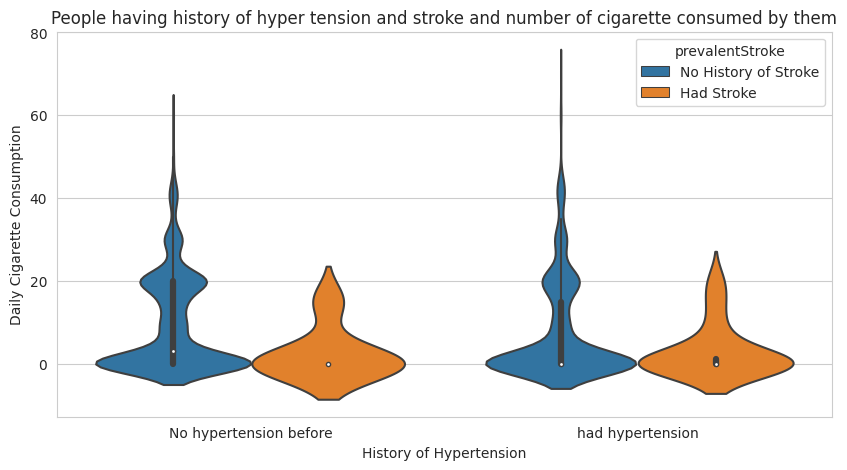

In [ ]:
# Chart - 8 visualization code

#People having history of hyper tension and stroke and number of cigarette consumed by them

fig=plt.figure(figsize=(10,5))
sns.violinplot(x='prevalentHyp', y='cigsPerDay', hue='prevalentStroke', data=data_visual)
plt.xlabel('History of Hypertension')
plt.ylabel('Daily Cigarette Consumption')
plt.title('People having history of hyper tension and stroke and number of cigarette consumed by them')

##### 1. Why did you pick the specific chart?

A violin plot is a type of data visualization that combines the features of a box plot and a kernel density plot. It is used to display the distribution of a continuous variable within different categories.

The violin plot consists of a series of vertical or horizontal "violins", each representing a category in the dataset. The width of each violin is proportional to the density of data points at that point, while the height represents the range of the data. The white dot in the middle of each violin represents the median of the data.



##### 2. What is/are the insight(s) found from the chart?

The dot inside the violin plot represents the median number of daily cigarette consumed by the people having and not having history of hypertension and width of plot suggest density .

We can conclude that their are wide range of people having hypertension but no histroy of stroke who consume cigarette more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Its a good thing since we can observe an decreasing pattern in terms of width in case of people having hypertension and having stroke history, which states the fact though overall cosumption is high but for people of this category the density or width is in decreasing manner.

#### Chart - 9

##**What kind of impact does various medical factors have upon risk of CHD ?**

Text(0, 0.5, 'Values')

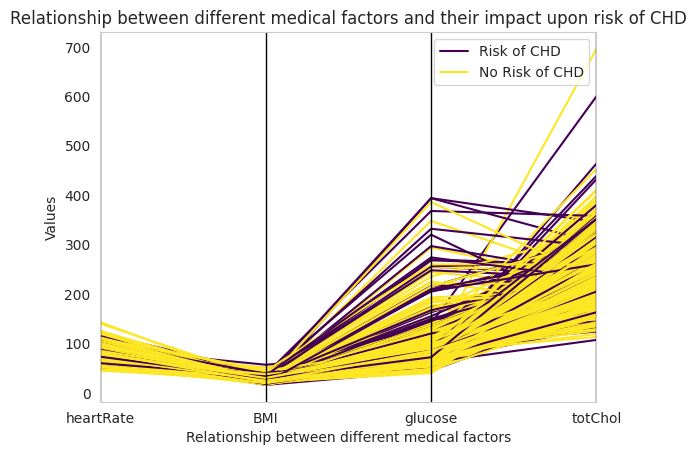

In [ ]:
# Chart - 9 visualization code

#Relationship between different medical factors and their impact upon risk of CHD

parallel_coordinates(frame=data_visual[['heartRate','BMI','glucose','totChol','TenYearCHD']], class_column='TenYearCHD', colormap='viridis')
plt.title('Relationship between different medical factors and their impact upon risk of CHD')
plt.xlabel('Relationship between different medical factors')
plt.ylabel('Values')

##### 1. Why did you pick the specific chart?

Parallel coordinates is a type of data visualization used to display multivariate data. It involves plotting multiple quantitative variables along a set of parallel axes, with each axis representing a different variable. The data points are then connected by lines to show how they relate to each other across the different variables.

Parallel coordinates are particularly useful when dealing with high-dimensional datasets, where there are many variables to consider.

##### 2. What is/are the insight(s) found from the chart?

The medical factors such as high glucose levels and totchol levels leads to high risk of CHD and not high risk of CHD respectively.

Heart rate and BMI are little less impactful here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We get to know what all factors are contributing towards our targetted goal which ultimately will make our prediction model smooth by including parameters which are of high importance .

#### Chart - 10


##**How many people have problem of BP and Diabetes together and does it gets severe with age ?**

Text(0, 0.5, 'Age of the person')

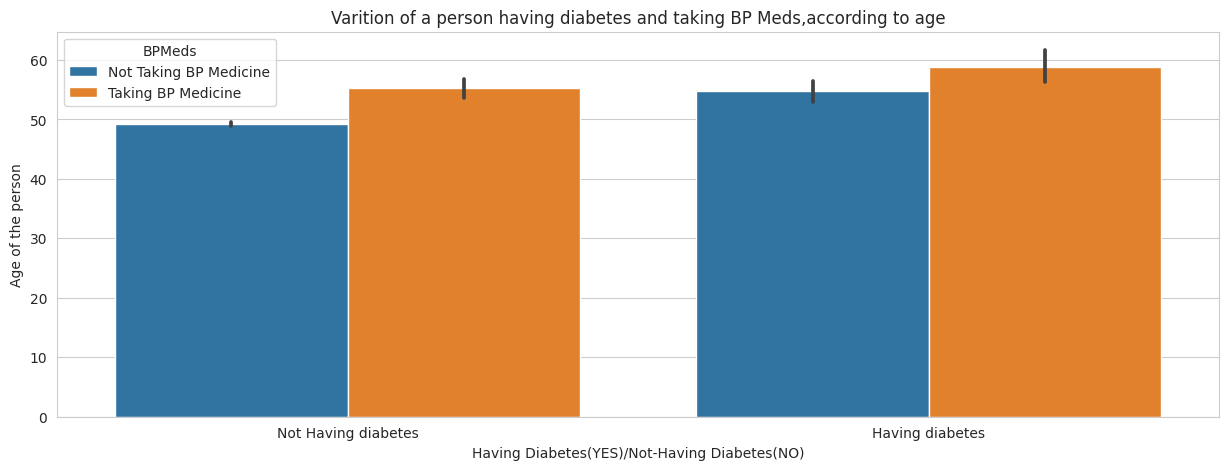

In [ ]:
# Chart - 10 visualization code

#Varition of a person having diabetes and taking BP Meds,according to age.

fig=plt.figure(figsize=(15,5))
sns.barplot(data=data_visual, x="diabetes", y="age",hue='BPMeds')
plt.title('Varition of a person having diabetes and taking BP Meds,according to age')
plt.xlabel('Having Diabetes(YES)/Not-Having Diabetes(NO)')
plt.ylabel('Age of the person')

##### 1. Why did you pick the specific chart?

We selected bar graph for display of this information because they are a popular and effective way to visually communicate data to a broad audience because they are easy to read and interpret.

Bar graphs are useful for displaying categorical data or numerical data with discrete values.

They are commonly used to show the frequency or proportion of different categories or to compare the magnitude of different data points.

##### 2. What is/are the insight(s) found from the chart?

We observed that people having diabetes and taking BP Meds tends to be elder in terms of age.

Contrarily the age varitions among the people not having diabetes and not takig medicines are low .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This trend was expected because as age of a person increases , they tend to get more affected medically .

#### Chart - 11

##**Does risk of CHD is more for people having history of stroke and higher measures of BP ?**

Text(0.5, 1.0, 'The Risk of CHD based on patient BP and whether they have a history of stroke or not')

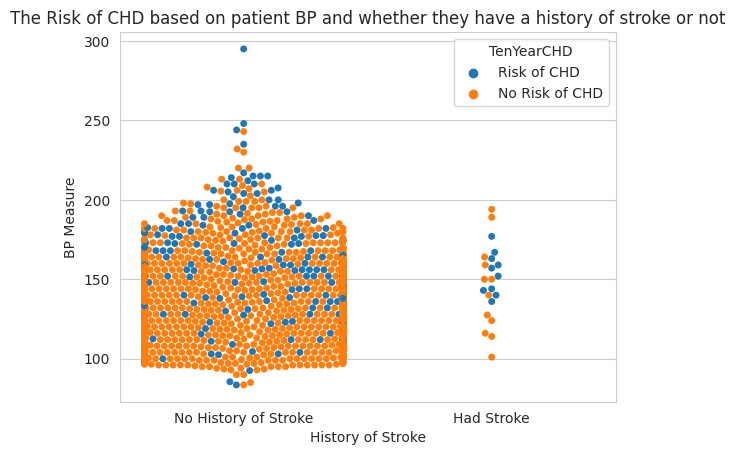

In [ ]:
# Chart - 11 visualization code

#The Risk of CHD based on patient BP and whether they have a history of stroke or not

sns.swarmplot(x='prevalentStroke', y='sysBP', data=data_visual,hue='TenYearCHD')
plt.xlabel('History of Stroke')
plt.ylabel('BP Measure')
plt.title('The Risk of CHD based on patient BP and whether they have a history of stroke or not')


##### 1. Why did you pick the specific chart?

A swarm plot is a type of categorical data visualization that displays the individual data points of a dataset in a way that avoids overlapping. It is similar to a scatterplot, but with the data points arranged so that they do not overlap.

In a swarm plot, each data point is plotted along an axis according to its value on a continuous variable. The data points are then "swarmed" together, with each point adjusted vertically to avoid overlapping with other points. This results in a more visually appealing and informative plot, especially when dealing with datasets with a large number of categories or data points.


##### 2. What is/are the insight(s) found from the chart?

Swarm plot as stated is famous for representing entire data points without overlapping hence from the grpah we could observe that we have very less people having histroy of stroke and utlimately no risk of CHD.

Even if we focus on the other face of the coin i.e. people having not history of stroke , still chances of CHD risk is very less there.

Also most of the people having BP mesures ranging from 100-200, however their are many people having expectionally high BP and having high risk of CHD associated also .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Its a good thing to observe that  we have very less people having histroy of stroke and utlimately no risk of CHD and  people having not history of stroke , still chances of CHD risk is very less there.

#### Chart - 12

##**What percentage of people (having hypertension history and associated risk of CHD) consume cigarette?**

Text(0, 0.5, 'Average Cigarette Consumption Percentage')

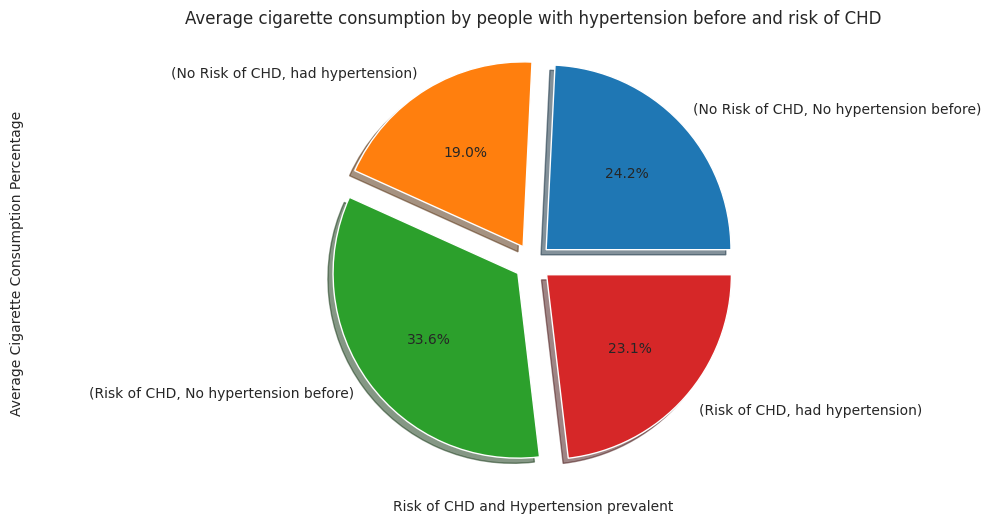

In [ ]:
# Chart - 12 visualization code

#Average cigarette consumption by people with hypertension before and associated risk of CHD

data_visual.groupby(['TenYearCHD','prevalentHyp'])['cigsPerDay'].mean().plot(kind='pie',subplots=True,figsize=(6,6),autopct='%1.1f%%',shadow=True,explode=[0.1,0.1,0.1,0.1])
plt.title('Average cigarette consumption by people with hypertension before and risk of CHD')
plt.xlabel('Risk of CHD and Hypertension prevalent')
plt.ylabel('Average Cigarette Consumption Percentage',labelpad=200)


##### 1. Why did you pick the specific chart?

We selected pie charts for display of this information because their major function is to show the composition of a whole dataset, where each segment represents a different category or subcategory of the data.

They can be useful for quickly and easily identifying which categories are most prominent or for comparing the relative sizes of different categories.

##### 2. What is/are the insight(s) found from the chart?

people having no history of hypertension before and having risk of CHD tend to consume more cigarette i.e. 33.6 %.

However major concern is towards the group of people having CHD risk and also had a history of hyper tension previously because its still 23.1% .

We should focus on lowering this factor.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We gained a very clear insight upon the behavioural factor of people suffering from an ailment previousely and still not ready to focus on health which will ultimately lead to high risk of CHD.


#### Chart - 13

##**Among males and females who have higher Risk of future CHD ?**


Text(0, 0.5, 'Count of males and females respectively')

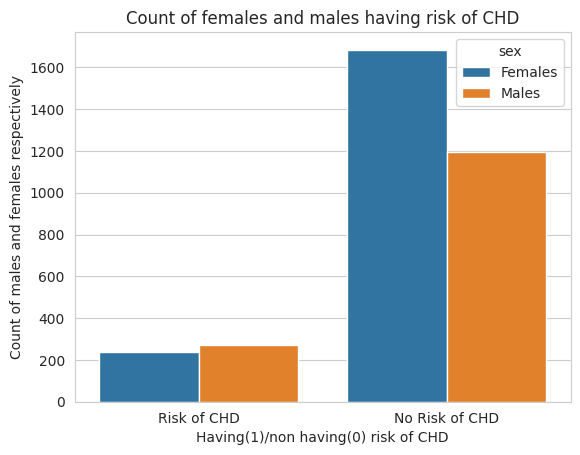

In [ ]:
# Chart - 13 visualization code
#10-year Risk of future CHD comparsion among male and female

sns.countplot(x='TenYearCHD',hue='sex', data=data_visual)
plt.title('Count of females and males having risk of CHD')
plt.xlabel('Having(1)/non having(0) risk of CHD')
plt.ylabel('Count of males and females respectively')

##### 1. Why did you pick the specific chart?

A count plot is a type of data visualization that displays the number of occurrences of each category in a categorical variable. It is a simple bar chart that shows the count or frequency of each unique value in a dataset.

Count plots are commonly used in data analysis to quickly identify the most common categories in a dataset and to compare the frequency of different categories. They can be easily created using libraries such as seaborn or matplotlib in Python.

##### 2. What is/are the insight(s) found from the chart?

Here we count easily figure out that males to tend to have more risk of CHD as compared to females.

However count of "no-risk" category is very high , which is a good thing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights tends to advice that males are having chances of getting affected and this might be due to lot of factors such as higher smoking rate etc.

#### Chart - 14 - Correlation Heatmap

##**Establishing relationship between different variables of data set and checking upon correlation between them ?**

<Axes: >

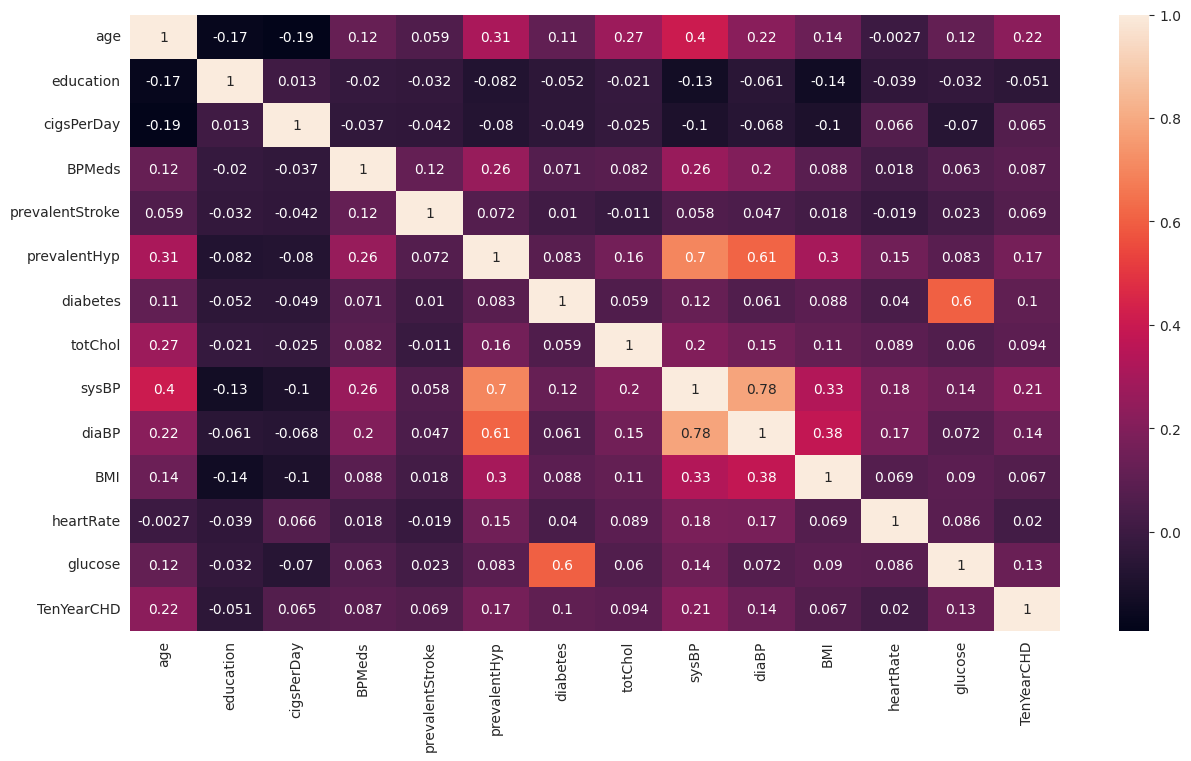

In [ ]:
# Correlation Heatmap visualization code
fig=plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables.

A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

The range of correlation is [-1,1].

##### 2. What is/are the insight(s) found from the chart?

* 'SysBP' and 'DiaBp' is having high correlation of 0.78.

* 'cigsPerDay' and 'is_smoking' having coorelation of 0.77.

* 'SysBP' and 'prevalentHyp' with 0.72 and 'DiaBp' and 'prevalentHyp' with 0.62.

#### Chart - 15 - Pair Plot

##**At what levels of education people tend to consume more ciggarette and does it affect their BMI and heart rate ?**

<Figure size 1500x1000 with 0 Axes>

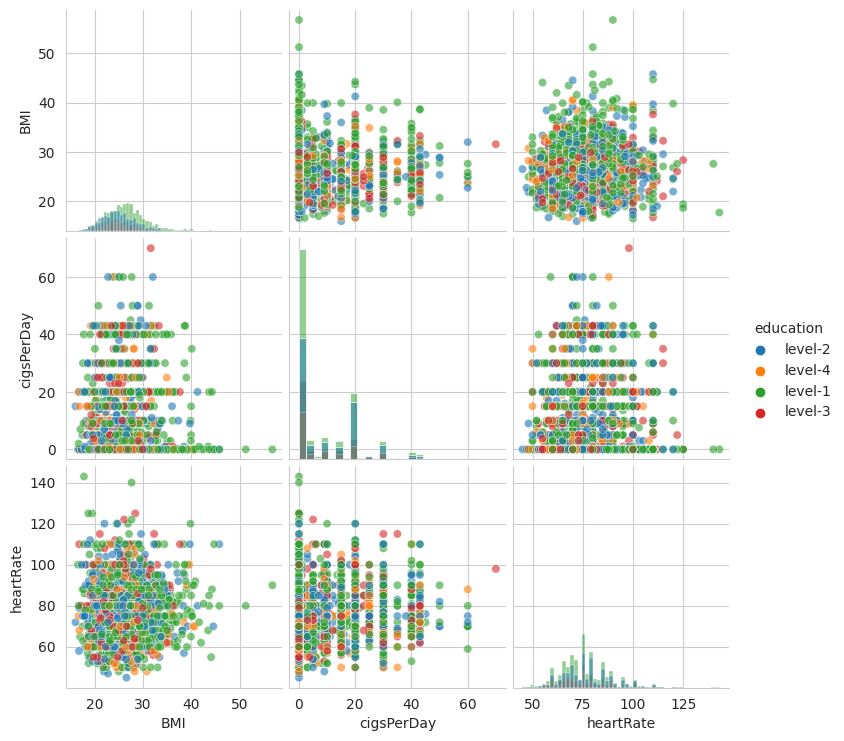

In [ ]:
# Pair Plot visualization code

#columns to be used for pair plot
df=data_visual[['BMI','cigsPerDay','heartRate','education']]

#Plotting
fig=plt.figure(figsize=(15,10))
sns.pairplot(df, hue='education', diag_kind='hist', plot_kws={'alpha': 0.6})


##### 1. Why did you pick the specific chart?

A pair plot is a type of data visualization that displays the pairwise relationships between multiple variables in a dataset.

The pair plot consists of a grid of scatter plots, where each variable in the dataset is plotted against every other variable.

Pair plots can be used for both continuous and categorical variables. For categorical variables, the plot may use a different type of plot, such as a stacked bar plot, to display the relationships between variables.



##### 2. What is/are the insight(s) found from the chart?

* With increasing rates of cigPerDay , we could see slight reduction in BMI , though it might be not that evident and same is the case with heart rate and cigPerDay.

* However in case of heart rate and BMI we could see that data points are much clustered around lower values .


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* There is no significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD.

* There is no relationship between age and blood pressure level of a person.

* There is no relationship between a person smoking and having risk of future CHD.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null_hypothesis :** There is no significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD.


* **Alternative_hypothesis :** There is a significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Define the null and alternative hypotheses
null_hypothesis='There is no significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD'
alternative_hypothesis=' There is a significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD'

# Perform Statistical Test to obtain P-Value and F- value
g1=data.groupby('TenYearCHD')['glucose'].get_group(0)
g2=data.groupby('TenYearCHD')['glucose'].get_group(1)

F, P = stats.f_oneway(g1,g2)
print(f"F-statistic: {F}")
print(f"p-value: {P}")
if P < 0.05:
   print(f"{alternative_hypothesis}, hence we are rejecting null hypothesis.")
else:
   print(f"{null_hypothesis},hence we fail to reject null hypothesis.")


F-statistic: 61.047504718638876
p-value: 7.376153816681938e-15
 There is a significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD, hence we are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

We choose analysis of variance (ANOVA) test for the hypotheses because it is used to determine whether there is a statistically significant difference in the means of two or more groups.



##### Why did you choose the specific statistical test?

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different.

On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (glucose level ) with different group (had risk of CHD and does not have risk of CHD).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **null__hypothesis :** There is no relationship between age and blood pressure level of a person.

* **alternative__hypothesis :** There is a relationship between age and blood pressure level of a person.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Define the null and alternative hypotheses
null__hypothesis = "There is no relationship between age and blood pressure level of a person"
alternative__hypothesis = "There is a relationship between age and blood pressure level of a person"

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(data['age'], data['sysBP'])

# Print the result of the test
print(f"Correlation coefficient: {r}")
print(f"p-value: {p}")
if p < 0.05:
   print(f"{alternative__hypothesis}, hence we are rejecting null hypothesis.")
else:
   print(f"{null__hypothesis},hence we fail to reject null hypothesis.")

Correlation coefficient: 0.4048449447742168
p-value: 6.838000925613275e-134
There is a relationship between age and blood pressure level of a person, hence we are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

We used Pearson correlation coefficient and the p-value to test the statistical significance of the relationship between the age and the BP Measure.

Specifically, we use pearsonr() function from the scipy.stats library to calculate the Pearson correlation coefficient and the p-value between the  age and the BP Measure columns of the data.

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, and it takes values between -1 and 1.

A value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.

It is suitable for testing the statistical significance of a linear relationship between two continuous variables.

In this case, the BP Measure column is a continuous variable that can take on any value within a certain range, and the age is also a continuous variable that can take on any integer value within a certain range.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**null__hypothesis :** There is no relationship between a person smoking and having risk of future CHD.

**alternative__hypothesis :** There is a relationship between a person smoking and having risk of future CHD.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Define the null and alternative hypotheses
null__hypothesis = "There is no relationship between a person smoking and having risk of future CHD"
alternative__hypothesis = "There is a relationship between a person smoking and having risk of future CHD"


# Create a contingency table from the two categorical variables
contingency_table = pd.crosstab(data['is_smoking'], data['TenYearCHD'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', stat)
print('Degrees of freedom:', dof)
print('P-value:', p)
print('Expected frequencies:', expected)
if p < 0.05:
   print(f"{alternative__hypothesis}, hence we are rejecting null hypothesis.")
else:
   print(f"{null__hypothesis},hence we fail to reject null hypothesis.")

Chi-square statistic: 3.763250993795598
Degrees of freedom: 1
P-value: 0.05239062274853224
Expected frequencies: [[1446.29410029  256.70589971]
 [1432.70589971  254.29410029]]
There is no relationship between a person smoking and having risk of future CHD,hence we fail to reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?



Chi-square statistic (also called chi-squared or χ²) is a statistical measure used to determine if there is a significant difference between observed data and expected data.

The basic idea behind the chi-square statistic is to compare the observed data with the data that would be expected if there were no relationship between the variables being studied.

The chi-square statistic is calculated by taking the sum of the squared differences between the observed and expected data, divided by the expected data. The resulting value is then compared to a chi-square distribution table to determine the p-value or level of significance.

If the p-value is less than the chosen level of significance, it indicates that there is a significant difference between the observed and expected data, and the null hypothesis is rejected. If the p-value is greater than the chosen level of significance, it indicates that there is not enough evidence to reject the null hypothesis.



##### Why did you choose the specific statistical test?

Since it is used to determine whether two or more groups are significantly different from one another. So we can use it to determine whether their is chance of future CHD who smoke cigarettes differs significantly from what would be expected if there were no smoke cigarettes.

The chi-square test is used to test for independence between two or more categorical variables.

We might use the chi-square test to determine whether there is a significant relationship between a person smoking and getting affected by future risk of CHD or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#Since we have a lot of missing values in our data set , we'll first perform missing value imputation.

#Segregating columns into categorical and numerical having null values.
cat=['education','BPMeds']
num=['glucose','totChol','cigsPerDay','BMI','heartRate']


In [ ]:
#Using Simple imputer for categorical values.

#initialising object
simp_imputer = SimpleImputer(strategy="most_frequent")
#fitting required data
simp_imputer.fit(data[cat])
#tranformed and and added back data
data[cat]= simp_imputer.transform(data[cat])

In [ ]:
#Using Knn imputer for numrical values.

#initialising object
knn_imputer= KNNImputer(n_neighbors=5)
#fitting required data
knn_imputer.fit(data[num])
#tranformed and and added back data
data[num]= knn_imputer.transform(data[num])

In [ ]:
#Checking missing values and finding it to be sorted.
data.isna().sum().sort_values(ascending=False)

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We used these two methods as follows :

* **SimpleImputer** is a class in the scikit-learn library used for imputing missing values in a dataset. It provides a simple strategy for handling missing values by filling in missing values with a constant value, the mean, median, or most frequent value of each feature.

* The SimpleImputer class takes several parameters, including the imputation strategy, the fill value for constant imputation, and the axis along which to impute the missing values. The default strategy is "mean", which imputes missing values with the mean value of the feature.

* To use SimpleImputer, you first create an instance of the class and specify the imputation strategy. You then fit the imputer to the dataset to calculate the values to be used for imputation, and finally transform the dataset by applying the imputation strategy to fill in the missing values.


* **KNNImputer** can be a useful tool for handling missing data in machine learning and data analysis tasks, particularly when the missing data is not randomly distributed and there is some structure to the data.

* KNNImputer is a class in the scikit-learn library used for imputing missing values in a dataset. It provides an imputation strategy based on the K-nearest neighbors algorithm, which estimates the missing values based on the values of the K-nearest neighbors of the sample.

* The KNNImputer class takes several parameters, including the number of nearest neighbors (K) to use for imputation, the distance metric used to measure the similarity between samples, and the weighting scheme used to compute the imputed value based on the neighbors.


### 2. Handling Outliers

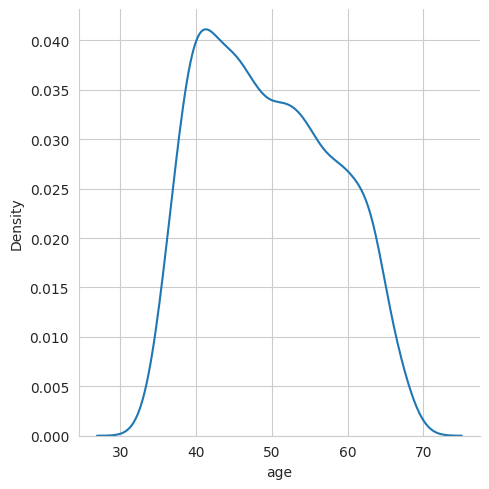

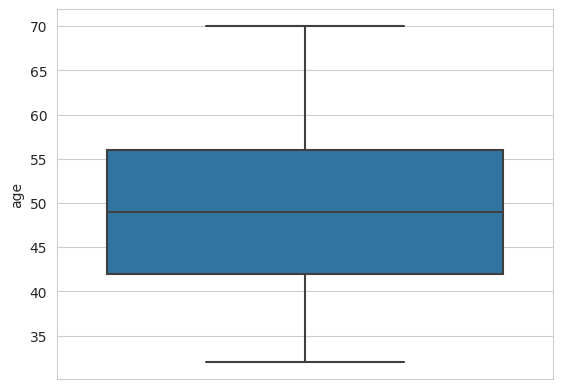

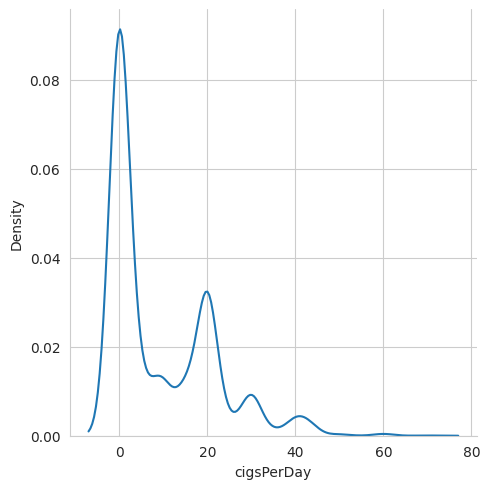

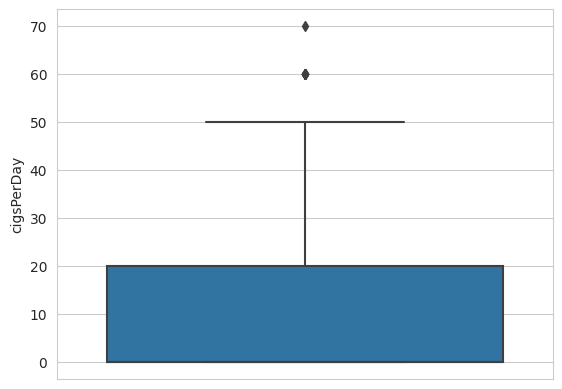

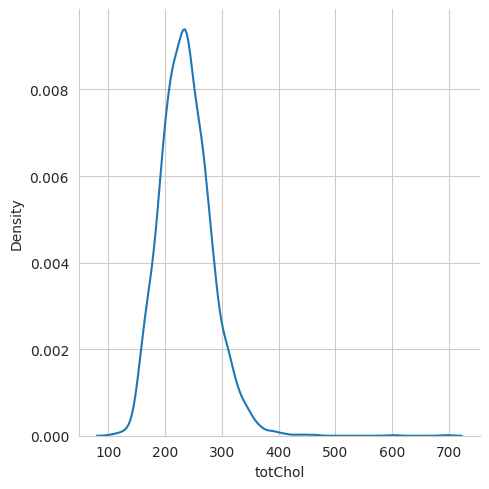

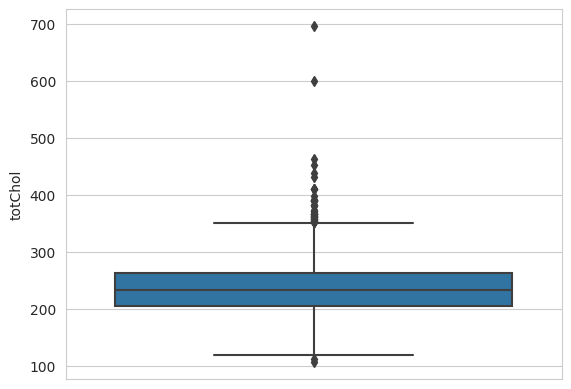

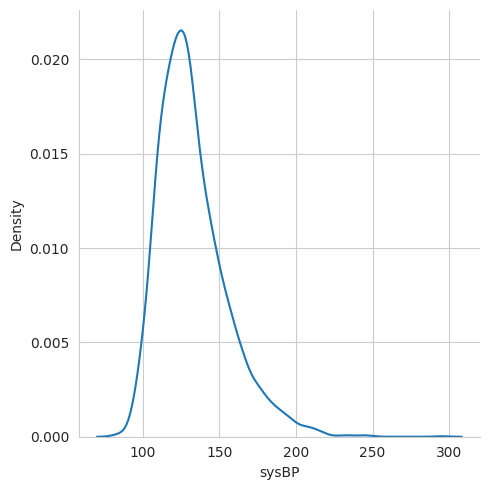

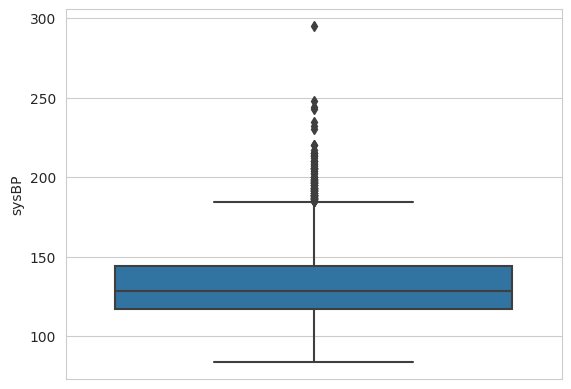

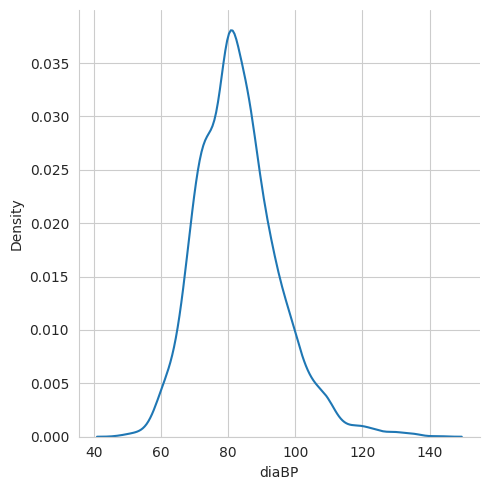

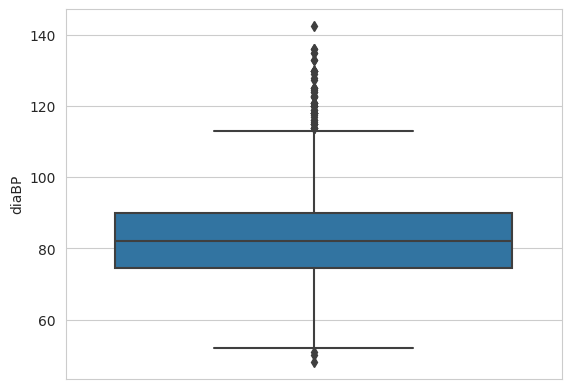

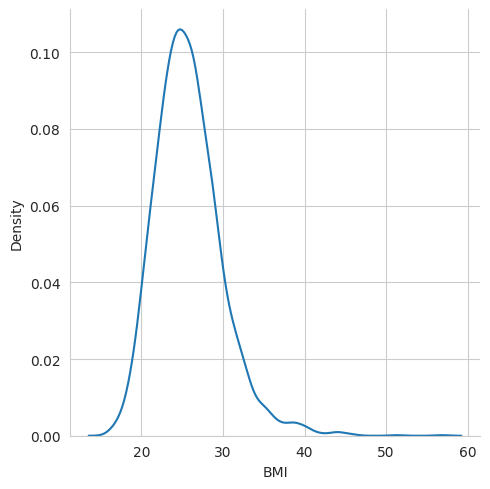

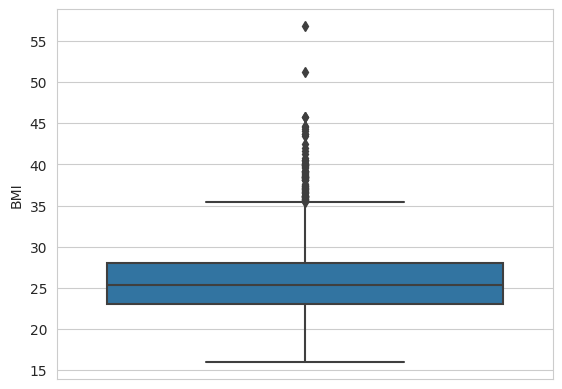

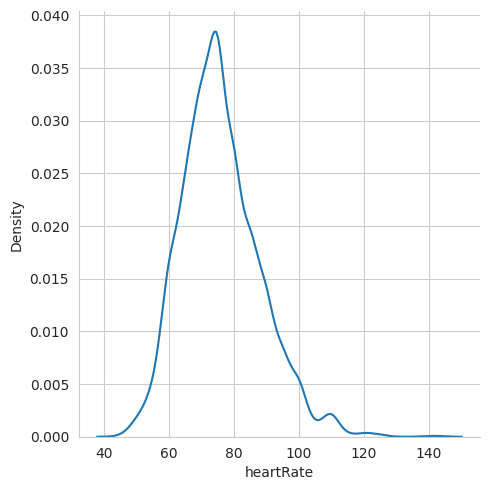

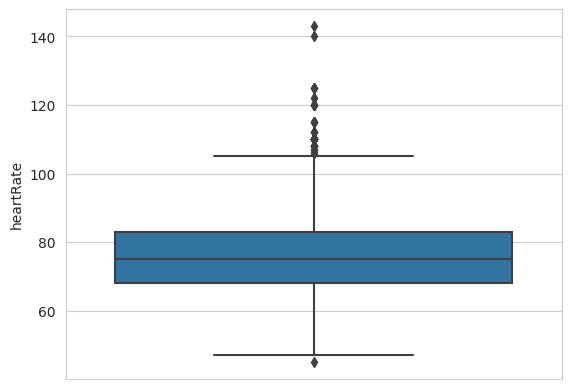

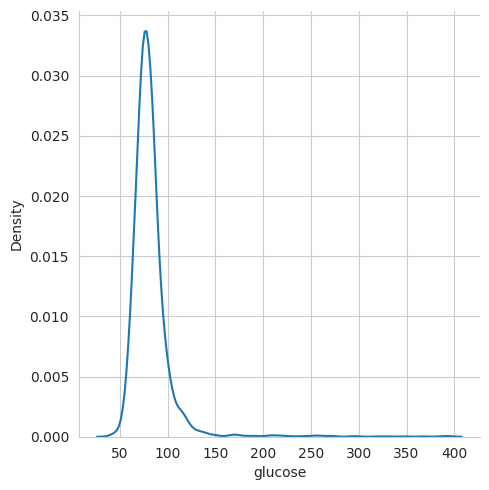

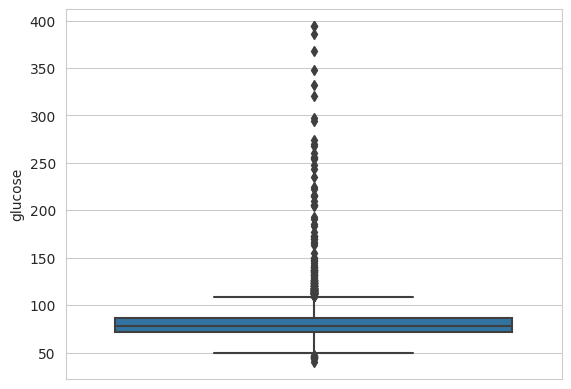

In [ ]:
# Handling Outliers & Outlier treatments
#Distribution and outlier analysis
for v in data_visual.select_dtypes(exclude=['object']):

   sns.displot(data=data, x=v, kind="kde")#displot for distribution analysis
   plt.show()

   sns.boxplot(data=data,y=v)#boxplot for outlier analysis
   plt.show()

In [ ]:
#Implementing Interquartile Range method
for v in ['totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate']:
   vals = data[v].quantile([0.25,0.75])
   iqr = vals.values[1] - vals.values[0]
   min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
   #Assigning those outliers with min and max values
   data[v] = data[v].apply(lambda x : min_lim if x < min_lim else x)
   data[v] = data[v].apply(lambda x : max_lim if x > max_lim else x)

In [ ]:
#Since glucose feature is having very high outliers, we'll be assigning max limit as 145(because in medical terms glucose level above 145 is considered to be high)
vals = data['glucose'].quantile([0.25,0.75])
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145

#Assigning those outliers with min and max values
data['glucose'] = data['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data['glucose'] = data['glucose'].apply(lambda x : max_lim if x > max_lim else x)

##### What all outlier treatment techniques have you used and why did you use those techniques?

* No outliers and good distribution is observed in age feature.

* However Outliers are observed in 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'glucose' features.

* So, in order to handle those **outliers IQR method** is implemented.

* IQR stands for Interquartile Range, which is a measure of the spread or variability of a dataset. It is defined as the difference between the third quartile (Q3) and the first quartile (Q1) of the dataset.

* The IQR method is a way to identify outliers in a dataset. An outlier is a data point that falls significantly outside the range of the rest of the data. To use the IQR method to identify outliers, you first calculate the IQR of the dataset. Then, any data point that falls more than 1.5 times the IQR below Q1 or above Q3 is considered an outlier.

* Since 'glucose' feature is having very high outliers, we'll be assigning max limit as 145(because in medical terms glucose level above 145 is considered to be high).

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#label Encoding categorical features for further better analysis

data['sex']=np.where(data['sex']=='M',1,0)
data['is_smoking']=np.where(data['is_smoking']=='YES',1,0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Here since we have just 2 columns to encode so and that too those are binary so we use simple **where function of numpy**.

* we are replacing male with one and female with zero in case of 'sex' column and in case of 'is_smoking' column , we are providing value of 1 to smokers and 0 to non smokers.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

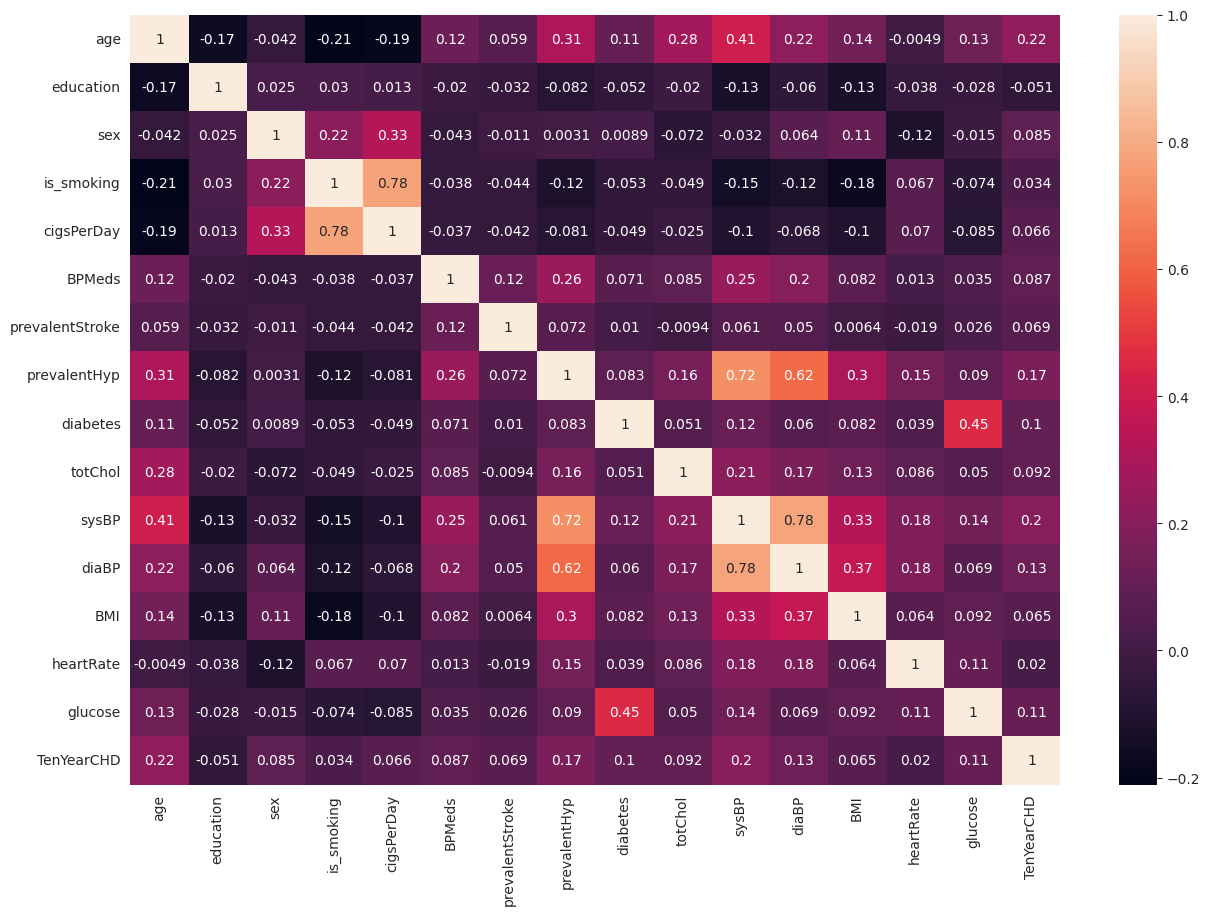

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#creating heatmap for analysis
fig=plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

From above correlation heatmap we observed that:-

* 'SysBP' and 'DiaBp' is having high correlation of 0.78.

* 'cigsPerDay' and 'is_smoking' having coorelation of 0.77.

* 'SysBP' and 'prevalentHyp' with 0.72 and 'DiaBp' and 'prevalentHyp' with 0.62.

* **In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'PP'(Pulse pressure) is introduced which is the deference between 'SysBP' and 'DiaBp'.**



In [ ]:
#In order to resolve high correlation between 'SysBP' and 'DiaBp', a new feature 'PP'(Pulse pressure) is introduced which is the deference between 'SysBP' and 'DiaBp'.
data['PP']=abs(data['sysBP']-data['diaBP'])
#removing other irrelevant highly correlated features
data=data.drop(columns=['is_smoking','diaBP','sysBP','prevalentHyp'])

<Axes: >

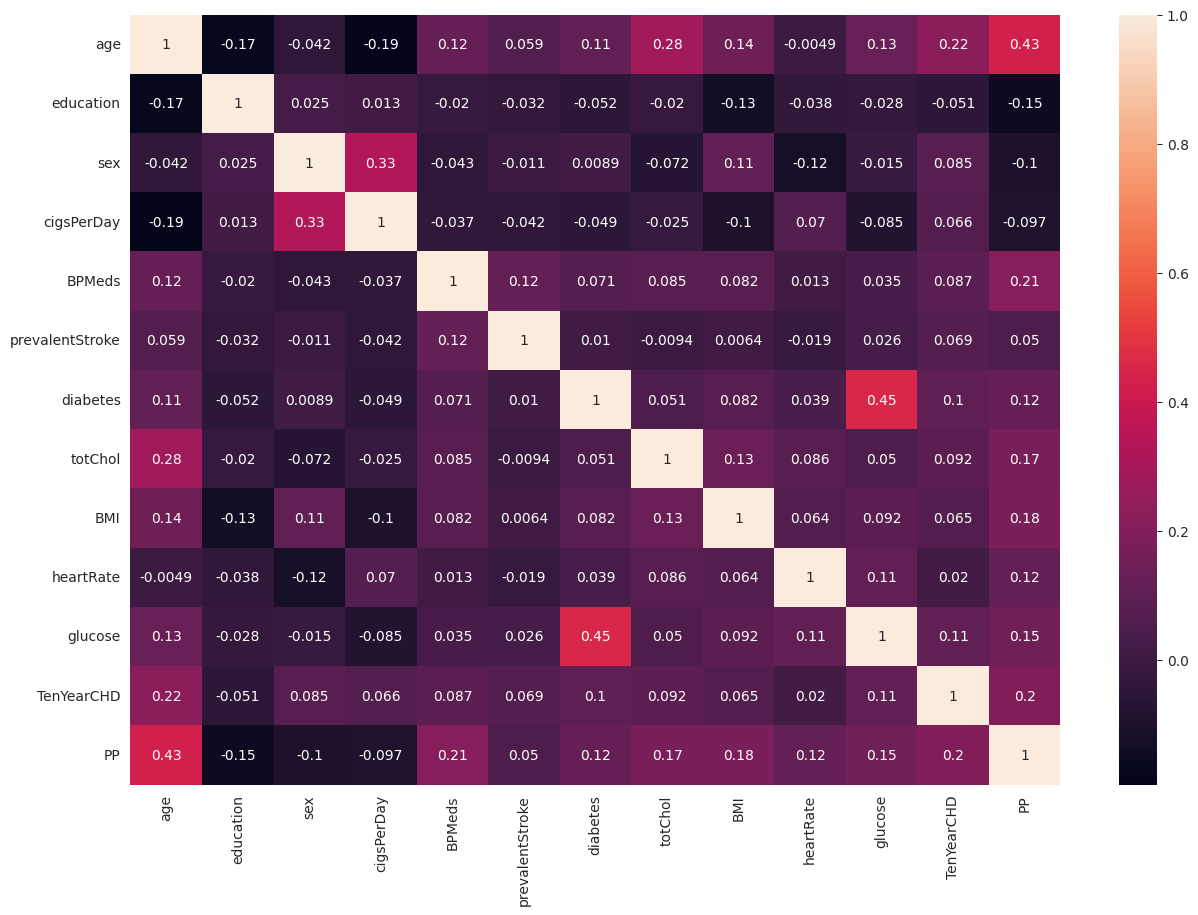

In [ ]:
#Rechecking correlation after necessary changes

fig=plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
#storing target variable seperately in Y and independent variables in X.
X = data.drop(columns=['TenYearCHD'], axis=1)
Y = data['TenYearCHD']

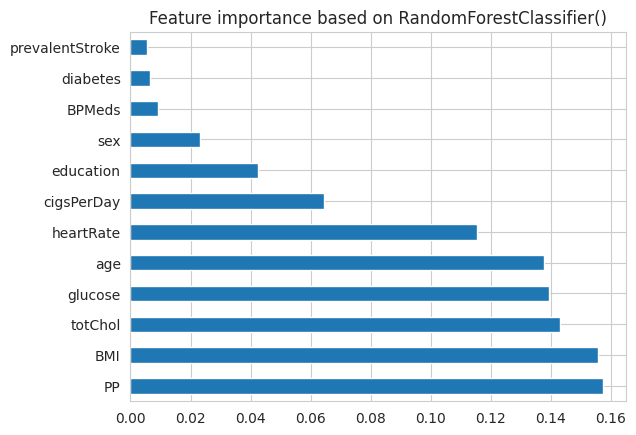

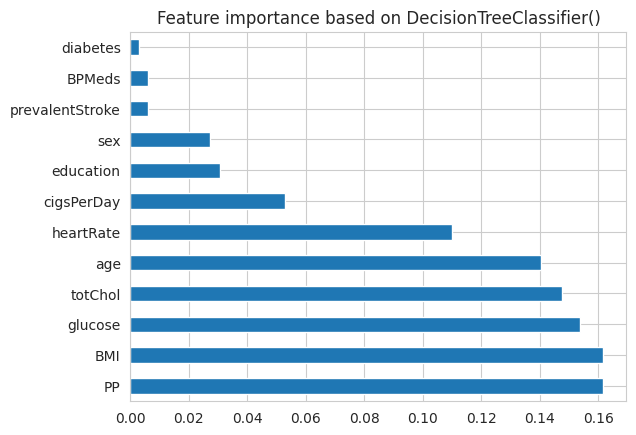

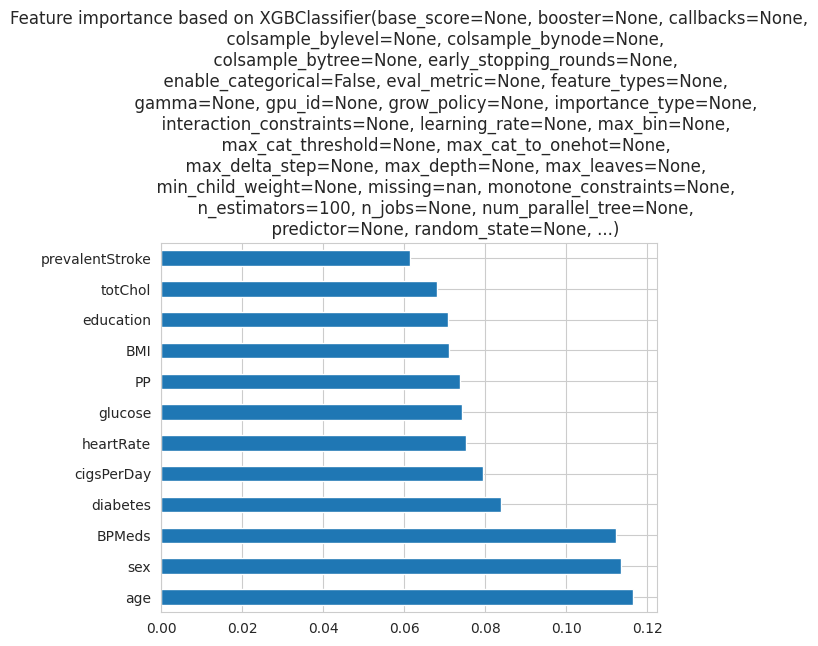

In [ ]:
#Analysing feature importance based RandomForestClassifier,DecisionTreeClassifier and XGBClassifier
for v in [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]:
    v.fit(X,Y)
    ranked_features=pd.Series(v.feature_importances_,index=X.columns)
    ranked_features.nlargest(15).plot(kind='barh')#barplot based on feature importance
    plt.title(f'Feature importance based on {v}')
    plt.show()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#Droping features from x variables for further model implementation.
X=X.drop(columns=['prevalentStroke','diabetes','BPMeds','BMI'])

In [ ]:
print(f"The important features are as follows {X.columns.to_list()}")

The important features are as follows ['age', 'education', 'sex', 'cigsPerDay', 'totChol', 'heartRate', 'glucose', 'PP']


##### What all feature selection methods have you used  and why?

We have used:-

* Random Forest Classifier
* Decision Tree Classifier
* XGB Classifier

Feature importance is a measure of the contribution of each feature or variable in a machine learning model to predict the target variable. It provides insights into the most important features that affect the model's output and helps in identifying the most relevant predictors of the target variable.

Random Forest Classifier, Decision Tree Classifier, and XGBClassifier are machine learning algorithms that can be used to identify feature importance.

* **Random Forest Classifier:** In a random forest classifier, the feature importance is calculated based on the mean decrease impurity of each feature across all decision trees in the forest. The impurity of a node in a decision tree is measured by the Gini index or the entropy. The mean decrease impurity of a feature is calculated by averaging the impurity decrease over all the decision trees that use that feature.

* **Decision Tree Classifier:** In a decision tree classifier, the feature importance is calculated based on the impurity decrease or information gain of each feature. The impurity decrease of a feature is the reduction in impurity that results from splitting a node on that feature. The information gain is a measure of the reduction in entropy or Gini index achieved by splitting a node on that feature.

* **XGBClassifier:**  In the XGBClassifier, feature importance is calculated based on the gain of each feature. The gain is a measure of the improvement in the objective function achieved by splitting a node on that feature. The objective function is a measure of the model's performance, such as accuracy, AUC, or log-loss.

##### Which all features you found important and why?

* After checking from correlation heatmap and feature importance technique like Random Forest Classifier
Decision Tree Classifier and
XGB Classifier we concluded these features to be important.

The important features are as follows :              

* 'Age'

* 'Education',
* 'Sex',
* 'CigsPerDay',
* 'TotChol',
* 'HeartRate',
* 'Glucose',
*  'PP'

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?



Data transformation in the context of a classification problem refers to the process of converting or modifying the original features or variables of the dataset to improve the performance of a classification model.

Here are some common data transformation techniques used in classification problems:

1. **Scaling:** Scaling is a technique used to transform the data to a standard scale, typically between 0 and 1. It can help in reducing the impact of different scales of the features on the model performance.

2. **Encoding categorical variables:**  Machine learning models require numeric input, so categorical variables need to be encoded before using them in the model. There are several encoding techniques, including one-hot encoding, label encoding, and target encoding.

3. **Feature engineering:** Feature engineering involves creating new features or modifying existing features to improve the model's performance.





### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Class imbalance is observed w.r.t target variable (Risk of CHD) since their are two categories present in this variable in the following proportion:-

* Class 0 - 2879


* Class 1 -511

Inorder to resolve class imbalance "**Synthetic Minority Over-sampling Technique**" is used here.




In [ ]:
# Handling Imbalanced Dataset (If needed)

# Using SMOTE to oversample
X,Y =SMOTE().fit_resample(X,Y)

In [ ]:
#checking value count of target variable
Y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique used in machine learning to address the problem of class imbalance.

* Class imbalance occurs when the distribution of the classes in the dataset is not balanced, and one class has significantly fewer samples than the other class.

* SMOTE works by synthesizing new samples from the minority class, creating a balanced dataset. It does this by selecting a minority class sample and finding its k-nearest neighbors (k is a user-defined parameter). The new synthetic samples are created by interpolating between the selected minority class sample and its k-nearest neighbors.

The SMOTE algorithm can be summarized in the following steps:

* Identify the minority class samples in the dataset.
* For each minority class sample, find its k-nearest neighbors.
* Select one of the k-nearest neighbors and create a synthetic sample by interpolating between the selected sample and the minority class sample.
* Repeat steps 2-3 until the desired level of over-sampling is achieved.

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 8)
(1440, 8)
(4318,)
(1440,)


##### What data splitting ratio have you used and why?

**We have used 75:25 split**.

However, there are two competing concerns:

With less training data, parameter estimates have greater variance. With less testing data, performance statistic will have greater variance.

It is best to divide data such that neither the variance in the training set nor the variance in the test set is too high.

### 8. Data Scaling

In [ ]:
# Scaling your data

#Scaling data using StandardScaler() since all the features are having measure scale
scaler = StandardScaler()
#Implementing StandardScaler() on train and test data
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

StandardScaler() is a preprocessing function in Python's scikit-learn library used for standardizing the features or variables of a dataset.

Standardization is a common preprocessing step in machine learning to transform the data in a way that each feature has zero mean and unit variance.

StandardScaler() applies the following formula to standardize the data:

z = (x - u) / s

where z is the standardized value, x is the original value, u is the mean of the feature, and s is the standard deviation of the feature.

Here are the steps involved in using StandardScaler() in scikit-learn:

1. Import the StandardScaler() class from the preprocessing module of the scikit-learn library.
2. Instantiate the StandardScaler() object.
3. Fit the StandardScaler() object on the training data.
4. Transform both the training and testing data using the transform() method of the StandardScaler() object.




## ***7. ML Model Implementation***

### ML Model - 1

##**Logistic Regression**

In [ ]:
#Defining logistic regression
reg = LogisticRegression()
# Fitting the Training dataset into the model
reg.fit(X_train, y_train)
# Predicting using the Testing Features
y_pred =reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Using logistic regression we get an recall of 68.18%
Using logistic regression we get an accuracy of 66.88%
The f1 score for logistic regression is 66.9%
The AUC score is 0.710854811850314.
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       733
           1       0.66      0.68      0.67       707

    accuracy                           0.67      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.67      0.67      0.67      1440



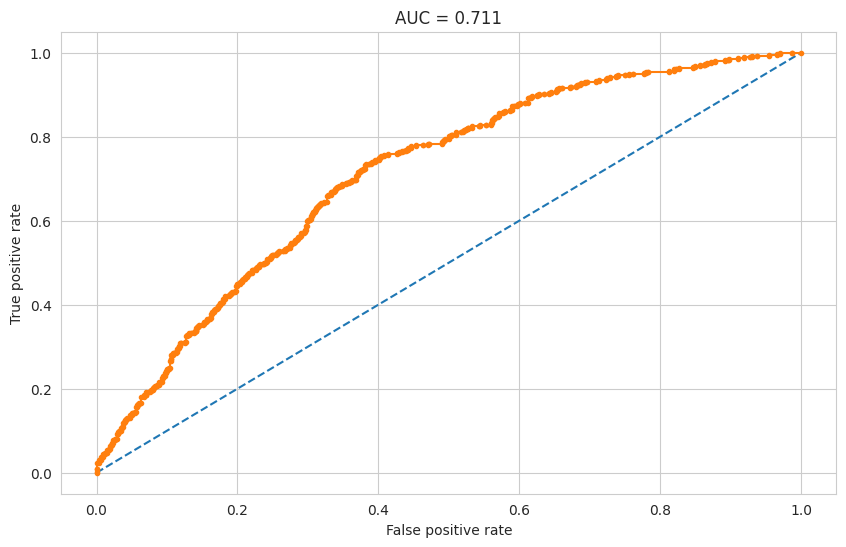

<Axes: >

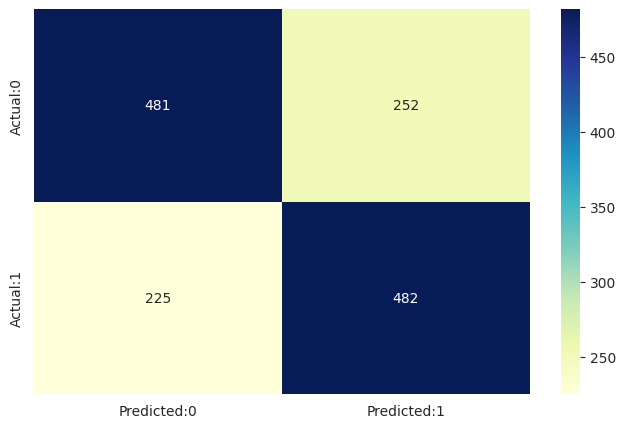

In [ ]:
# Visualizing evaluation Metric Score chart

#Recall Score
recall = recall_score(y_test, y_pred)
print(f"Using logistic regression we get an recall of {round(recall*100,2)}%")


#Printing the accuracy of the model
log_accuracy = accuracy_score(y_test,y_pred)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")


#f1 score for logistic regression
logistic_f1 = f1_score(y_test, y_pred)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')


# ROC curve and AUC
probs_reg = reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_reg = probs_reg[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs_reg)
print(f"The AUC score is {log_auc}.")


#Displaying the Classification Report
print(classification_report(y_test,y_pred))


# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_reg)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()


#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Logistic regression is a statistical method used to analyze the relationship between a categorical dependent variable and one or more independent variables. It is a popular tool in the field of machine learning and is commonly used for binary classification problems.

Logistic regression works by estimating the probability of an event occurring based on one or more input variables, which can be either continuous or categorical.

The logistic regression model uses a logistic function (also known as a sigmoid function) to map the predicted probabilities to values between 0 and 1. This function is an S-shaped curve that allows the model to output a probability value for any input value of the independent variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Importing GridSearchCV
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [ ]:
#train the classifier
logistic_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']})

In [ ]:
#Getting the best parameters
logistic_clf.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

Using logistic regression we get an recall of 68.18%
Using logistic regression we get an accuracy of 66.88%
The f1 score for logistic regression is 66.9%
The AUC score is 0.710854811850314
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       733
           1       0.66      0.68      0.67       707

    accuracy                           0.67      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.67      0.67      0.67      1440



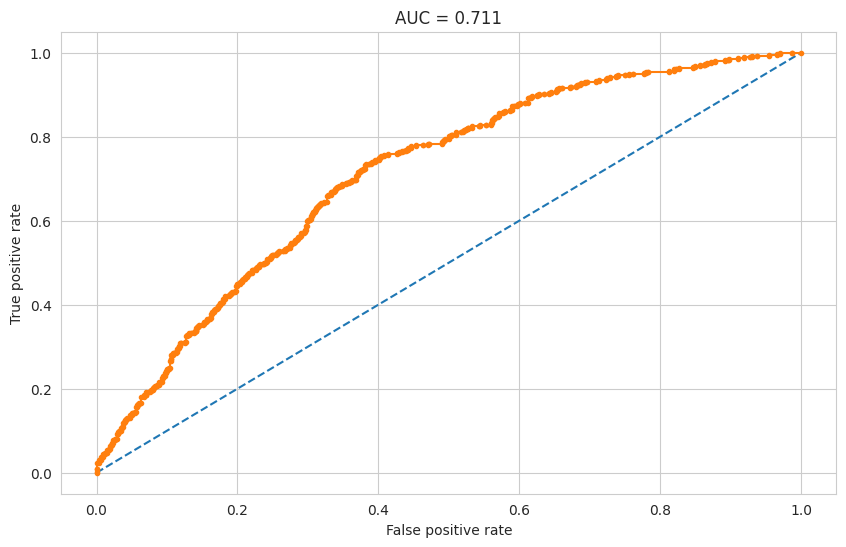

<Axes: >

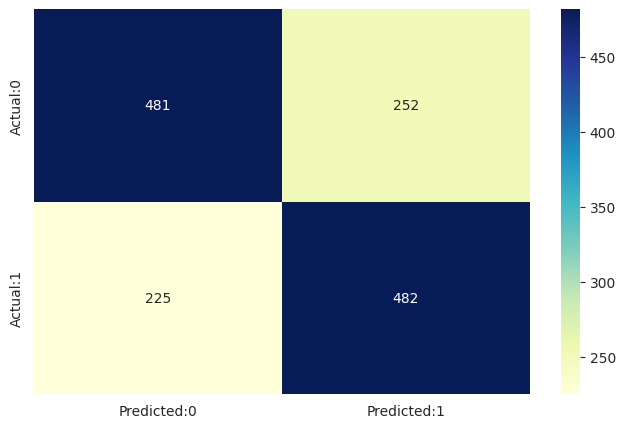

In [ ]:
#Recall Score
recall_tuned = recall_score(y_test,logistic_predict)
print(f"Using logistic regression we get an recall of {round(recall_tuned*100,2)}%")


#Printing the accuracy of the model
log_accuracy_tuned = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy_tuned*100,2)}%")

#f1 score for logistic regression
logistic_f1_tuned = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1_tuned*100,2)}%')

# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc_tuned = roc_auc_score(y_test, probs)
print(f"The AUC score is {log_auc_tuned}")

#Displaying the Classification Report
print(classification_report(y_test,logistic_predict))


# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc_tuned,3)}")
plt.show()

#Plotting the Confusion Matrix
cm_t=confusion_matrix(y_test,logistic_predict)
conf_matrix_t=pd.DataFrame(data=cm_t,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_t, annot=True,fmt='d',cmap="YlGnBu")



##### Which hyperparameter optimization technique have you used and why?

We used **GridSearchCV hyperparameter optimization technique** which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Accuracy** remained same as **67.1528%** ,
**AUC** got slightly updated to **72.8553%** ,
**F1 score** got slightly reduced to **67.4467%** and
**Recall** got slightly reduced to **69.3069%**.

### ML Model - 2

##**K-Neighbors-Classifier**

In [ ]:
#Defining K-Neighbors Classifier
knn = KNeighborsClassifier()
# Fitting the Training dataset into the model
knn.fit(X_train, y_train)
# Predicting using the Testing Features
y_pred_2 = knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Using K-Neighbors Classifier we get an recall of 89.96%
Using K-Neighbors Classifier we get an accuracy of 76.25%
The f1 score for K-Neighbors Classifier is 78.81%
The AUC score is 0.8556348423772411.
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       733
           1       0.70      0.90      0.79       707

    accuracy                           0.76      1440
   macro avg       0.78      0.76      0.76      1440
weighted avg       0.79      0.76      0.76      1440



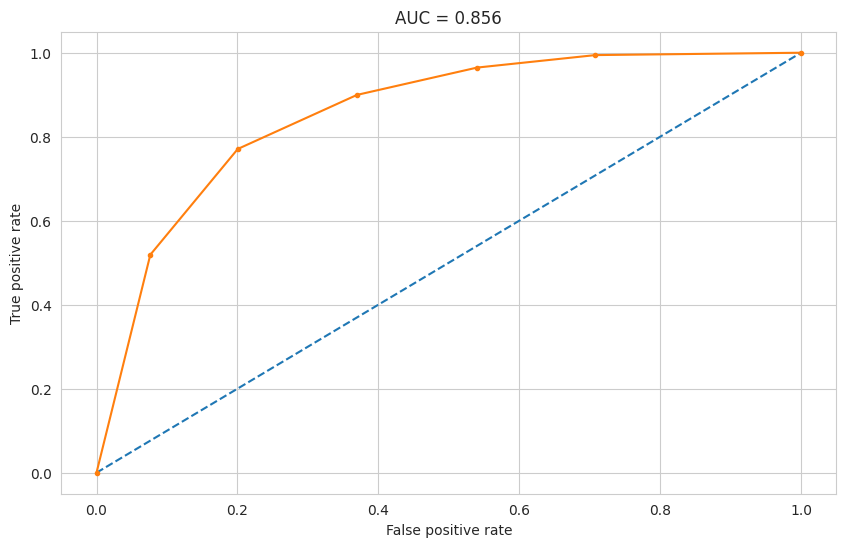

<Axes: >

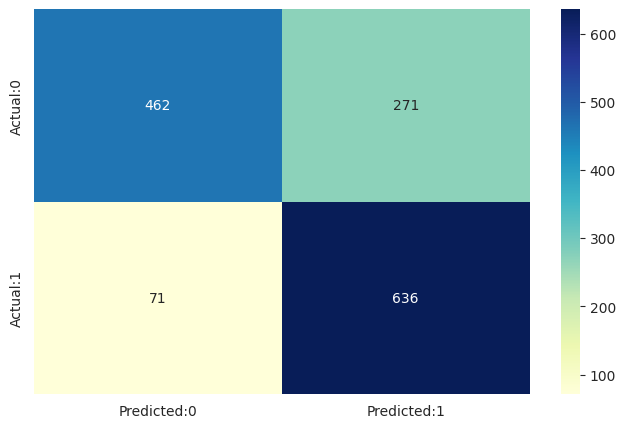

In [ ]:
# Visualizing evaluation Metric Score chart

#Recall Score
knn_recall = recall_score(y_test, y_pred_2)
print(f"Using K-Neighbors Classifier we get an recall of {round(knn_recall*100,2)}%")



#Printing the accuracy of the model
knn_accuracy = accuracy_score(y_test,y_pred_2)
print(f"Using K-Neighbors Classifier we get an accuracy of {round(knn_accuracy*100,2)}%")


#f1 score for logistic regression
nn_f1 = f1_score(y_test, y_pred_2)
print(f'The f1 score for K-Neighbors Classifier is {round(nn_f1*100,2)}%')


# ROC curve and AUC
probs_k = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_k = probs_k[:, 1]
# calculate AUC
knn_auc= roc_auc_score(y_test, probs_k)
print(f"The AUC score is {knn_auc}.")


#Displaying the Classification Report
print(classification_report(y_test,y_pred_2))


# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_k)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()


#Plotting the Confusion Matrix
cm_knn=confusion_matrix(y_test,y_pred_2)
conf_matrix_knn=pd.DataFrame(data=cm_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_knn, annot=True,fmt='d',cmap="YlGnBu")

K-Neighbors-Classifier (K-NN) is a non-parametric machine learning algorithm used for both classification and regression tasks. It is a simple, yet effective algorithm that can be used in a wide range of applications.

In K-NN, the training dataset consists of n data points with known class labels, and the algorithm makes predictions for new data points by finding the k training samples that are closest in distance to the new data point. The k neighbors can be determined by calculating the Euclidean distance or some other distance metric between the new data point and the training data points. The predicted class of the new data point is then determined by taking the majority class among the k neighbors.

K-NN is a lazy learning algorithm, meaning that it does not require any training process to be carried out, which makes it very fast in the classification phase. However, the drawback is that K-NN requires a lot of memory storage for the training dataset since the algorithm has to keep all the training samples in memory.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [ ]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [ ]:
# predictions
knn_predict = knn_clf.predict(X_test)

Using K-Neighbors Classifier we get an recall of 93.07%
Using K-Neighbors Classifier we get an accuracy of 84.31%
The f1 score for K-Neighbors Classifier is 85.34%
The AUC score is 0.8446098361541474.
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       733
           1       0.79      0.93      0.85       707

    accuracy                           0.84      1440
   macro avg       0.85      0.84      0.84      1440
weighted avg       0.85      0.84      0.84      1440



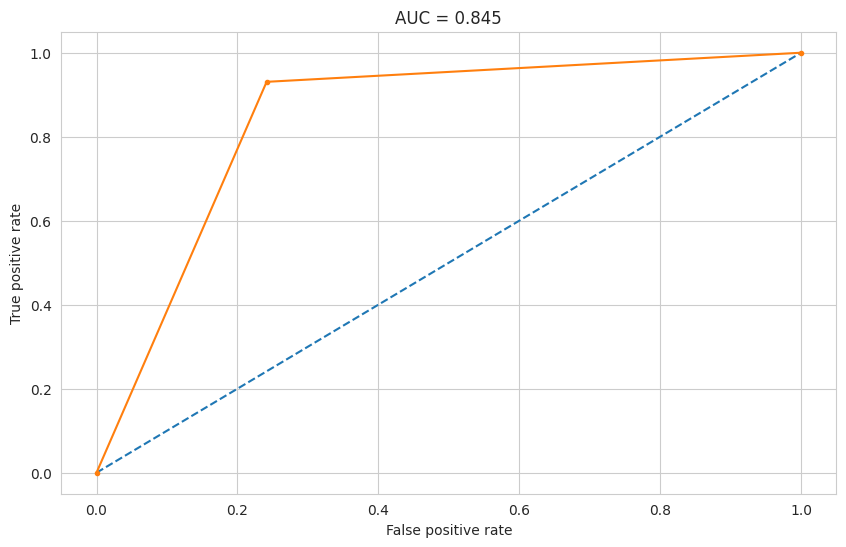

<Axes: >

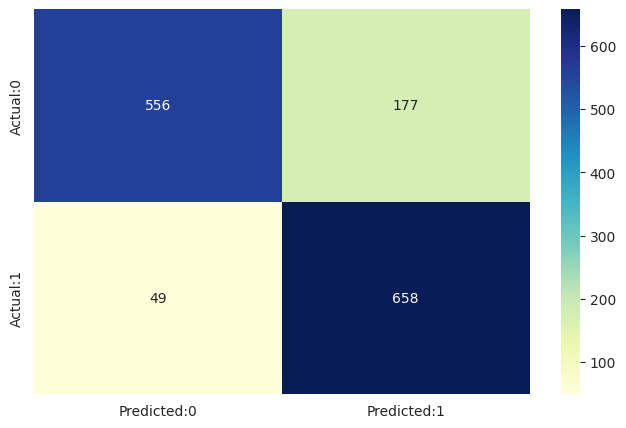

In [ ]:
knn_recall_tuned = recall_score(y_test,knn_predict)
print(f"Using K-Neighbors Classifier we get an recall of {round(knn_recall_tuned*100,2)}%")


#Printing the accuracy of the model
knn_accuracy_tuned = accuracy_score(y_test,knn_predict)
print(f"Using K-Neighbors Classifier we get an accuracy of {round(knn_accuracy_tuned*100,2)}%")


#f1 score for logistic regression
nn_f1_tuned = f1_score(y_test,knn_predict)
print(f'The f1 score for K-Neighbors Classifier is {round(nn_f1_tuned*100,2)}%')


# ROC curve and AUC
probs_k_t =knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_k_t = probs_k_t[:, 1]
# calculate AUC
knn_auc_tuned= roc_auc_score(y_test, probs_k_t)
print(f"The AUC score is {knn_auc_tuned}.")


#Displaying the Classification Report
print(classification_report(y_test,knn_predict))


# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_k_t)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc_tuned,3)}")
plt.show()


#Plotting the Confusion Matrix
cm_knn_t=confusion_matrix(y_test,knn_predict)
conf_matrix_knn_t=pd.DataFrame(data=cm_knn_t,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_knn_t, annot=True,fmt='d',cmap="YlGnBu")

##### Which hyperparameter optimization technique have you used and why?

We used **GridSearchCV hyperparameter optimization technique** which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Accuracy** got updated to **84.9306%** ,
**AUC** got reduced to **85.1201%** ,
**F1 score** got updated to **86.1695%** and
**Recall** got updated to **95.6153%**.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.



Accuracy, ROC, recall, and F1 score are evaluation metrics used in machine learning to assess the performance of classification models.

In the context of our problem statment, these metrics can provide insight into how well a model is able to accurately predict future risk of CHD.

- **Accuracy:** Accuracy measures the proportion of correct predictions made by the model among all predictions. In the context of our problem statment, accuracy can be used to evaluate the success rate of predicting whether a patient has future risk of CHD or not. Higher accuracy indicates that the model is making more correct predictions, which can lead to better decision-making and improved patient outcomes.

- **ROC (Receiver Operating Characteristic) curve:** ROC curve is a plot of sensitivity (True Positive Rate) against specificity (False Positive Rate) at different thresholds. In the context of our problem statment, ROC curves can be used to evaluate the performance of models in predicting the presence or absence of a CHD. A higher ROC curve indicates better performance and can help in choosing an optimal threshold for the model.

- **Recall:** Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive cases that were correctly identified by the model. In this context , recall can be used to evaluate the model's ability to accurately predict patients who are at high risk of CHD. Higher recall indicates that the model is identifying more true positive cases, which is beneficial for early intervention and prevention of adverse events.

- **F1 score:** F1 score is a measure of the model's overall performance, taking into account both precision and recall. It is calculated as the harmonic mean of precision and recall. In this context , F1 score can be used to evaluate the model's ability to accurately predict patient outcomes. A higher F1 score indicates better overall performance of the model in terms of both precision and recall, which can lead to improved patient outcomes and reduced costs.

### ML Model - 3

##**SVM(Support Vector Machine)**

In [ ]:
# ML Model - 3 Implementation

#Defining svm object
svm = SVC(kernel='rbf',probability=True)
# Fitting the Training dataset into the model
svm.fit(X_train, y_train)
# Predicting using the Testing Features
y_pred_3 = svm.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Using SVM we get an recall of 77.09%
Using SVM we get an accuracy of 70.49%
The f1 score for SVM is 71.95%
The AUC score is 0.7670112363019581.
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       733
           1       0.67      0.77      0.72       707

    accuracy                           0.70      1440
   macro avg       0.71      0.71      0.70      1440
weighted avg       0.71      0.70      0.70      1440



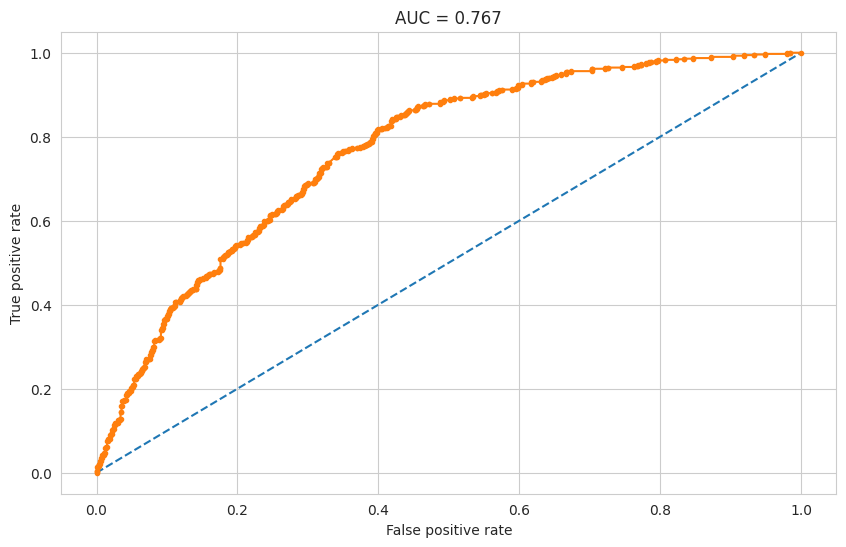

<Axes: >

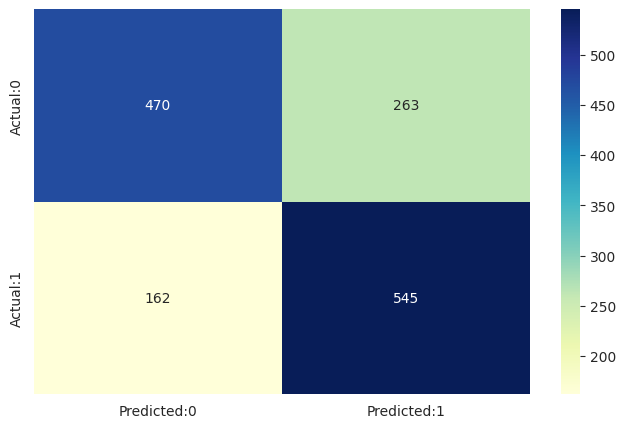

In [ ]:
# Visualizing evaluation Metric Score chart

#recall score
svm_recall= recall_score(y_test,y_pred_3)
print(f"Using SVM we get an recall of {round(svm_recall*100,2)}%")


#Printing the accuracy of the model
svm_accuracy= accuracy_score(y_test,y_pred_3)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")


#f1 score for logistic regression
svm_f1= f1_score(y_test,y_pred_3)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')


# ROC curve and AUC
probs_s =svm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_s = probs_s[:, 1]
# calculate AUC
svm_auc= roc_auc_score(y_test, probs_s)
print(f"The AUC score is {svm_auc}.")


#Displaying the Classification Report
print(classification_report(y_test,y_pred_3))


# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_s)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()


#Plotting the Confusion Matrix
cm_s=confusion_matrix(y_test,y_pred_3)
conf_matrix_s=pd.DataFrame(data=cm_s,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_s, annot=True,fmt='d',cmap="YlGnBu")



A Support Vector Machine (SVM) is a type of machine learning model that is commonly used for classification and regression analysis.

It works by finding the optimal boundary or hyperplane that separates the different classes of data points in a high-dimensional feature space.

 The hyperplane is chosen in such a way that it maximizes the margin, which is the distance between the hyperplane and the closest data points from each class. The closer the margin, the better the model's generalization performance will be on new data.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#setting values of parameters for hyperparameter tuning.

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [ ]:
# predictions
svm_predict = svm_clf.predict(X_test)

Using SVM we get an recall of 91.09%
Using SVM we get an accuracy of 86.11%
The f1 score for SVM is 86.56%
The AUC score is 0.919269592131694.
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       733
           1       0.82      0.91      0.87       707

    accuracy                           0.86      1440
   macro avg       0.86      0.86      0.86      1440
weighted avg       0.87      0.86      0.86      1440



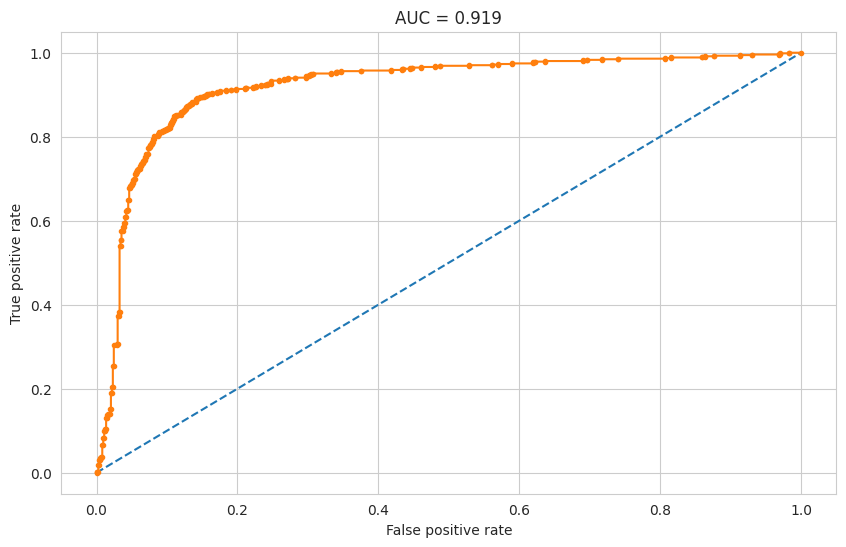

<Axes: >

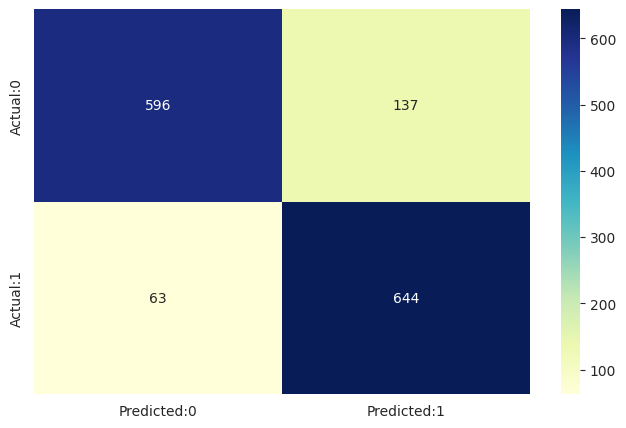

In [ ]:
# Visualizing evaluation Metric Score chart

svm_recall_tuned= recall_score(y_test,svm_predict)
print(f"Using SVM we get an recall of {round(svm_recall_tuned*100,2)}%")

#Printing the accuracy of the model
svm_accuracy_tuned = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy_tuned*100,2)}%")


#f1 score for logistic regression
svm_f1_tuned= f1_score(y_test,svm_predict)
print(f'The f1 score for SVM is {round(svm_f1_tuned*100,2)}%')


# ROC curve and AUC
probs_s_t =svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_s_t = probs_s_t[:, 1]
# calculate AUC
svm_auc_tuned= roc_auc_score(y_test, probs_s_t)
print(f"The AUC score is {svm_auc_tuned}.")


#Displaying the Classification Report
print(classification_report(y_test,svm_predict))


# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_s_t)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc_tuned,3)}")
plt.show()


#Plotting the Confusion Matrix
cm_s_t=confusion_matrix(y_test,svm_predict)
conf_matrix_s_t=pd.DataFrame(data=cm_s_t,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_s_t, annot=True,fmt='d',cmap="YlGnBu")



##### Which hyperparameter optimization technique have you used and why?

We used **GridSearchCV hyperparameter optimization technique** which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Accuracy** got updated to **0.871528** ,
**AUC** got updated to **93.7303 %** ,
**F1 score** got updated to **87.7076 %** and
**Recall** got updated to **93.3522%**.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* Since our aim was to lower the false-negative value so that patients do not get detected improperly and are demonstrated to be safe, We consider the recall score as the evaluation matrix for a positive business impact.


* However all measures, including Precision, Recall, Accuracy, and F1 score were evaluated for each model.

Based on this analysis,

* Logistic regression can identify positive cases with a 69.8727 % Recall.


* With the help of K-nearest neighbours, positive cases may be predicted with a 93.2107	% Recall.

* Using a Support Vector Machine, positive cases can be predicted with an 75.1061 %  Recall.

* If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.

* Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.




### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
#Defining the comparison of Models
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1,'Recall':recall},
    "Logistic regression Tuned":{'Accuracy':log_accuracy_tuned, 'AUC':log_auc_tuned, 'F1 score':logistic_f1_tuned,'Recall':recall_tuned},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':nn_f1,'Recall':knn_recall},
    "K-nearest neighbours Tuned":{'Accuracy':knn_accuracy_tuned, 'AUC':knn_auc_tuned, 'F1 score':nn_f1_tuned,'Recall':knn_recall_tuned},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1,'Recall':svm_recall},
    "Support vector machine Tuned":{'Accuracy':svm_accuracy_tuned, 'AUC':svm_auc_tuned, 'F1 score':svm_f1_tuned,'Recall':svm_recall_tuned}
})

In [ ]:
#Displaying the comparison
comparison

Logistic regression  Logistic regression Tuned  \
Accuracy             0.668750                   0.668750   
AUC                  0.710855                   0.710855   
F1 score             0.668980                   0.668980   
Recall               0.681754                   0.681754   

          K-nearest neighbours  K-nearest neighbours Tuned  \
Accuracy              0.762500                    0.843056   
AUC                   0.855635                    0.844610   
F1 score              0.788104                    0.853437   
Recall                0.899576                    0.930693   

          Support vector machine  Support vector machine Tuned  
Accuracy                0.704861                      0.861111  
AUC                     0.767011                      0.919270  
F1 score                0.719472                      0.865591  
Recall                  0.770863                      0.910891

We'll consider using **Support vector machine** Tuned model as final model.

This model has the highest Accuracy , F1 Score and AUC values which indicates that it is doing a good job of classification.

Since it is making relatively accurate predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Here we will be using KNN model and for model explainability we'll use LIME (Local Interpretable Model-Agnostic Explanations).**




The LIME (Local Interpretable Model-Agnostic Explanations) algorithm is a model-agnostic interpretability method that provides local explanations for individual predictions of any black box model.

Here are the steps involved in the working of LIME:

1. Sample instances: The LIME algorithm starts by sampling instances from the dataset around the prediction of interest. These instances are called the "local neighborhood" and are used to approximate the behavior of the black box model in the local region around the prediction.

2. Perturb features: The features of the sampled instances are perturbed, creating new instances that are slightly different from the original ones. These perturbed instances are used to train the simpler, interpretable model that will approximate the black box model.

3. Fit interpretable model: The perturbed instances are used to train a simpler, interpretable model such as linear regression, decision tree or random forest. This simpler model is trained to predict the same output as the black box model for the local neighborhood.

4. Assign feature importance weights: The simpler model is used to assign feature importance weights to each feature of the original instance. These weights represent the contribution of each feature to the prediction of the black box model in the local neighborhood.

5. Explain prediction: The feature importance weights are used to explain the prediction of the black box model for the original instance. The most important features that contributed to the prediction are highlighted and the contribution of each feature is quantified.

By following these steps, LIME can provide local, interpretable explanations for individual predictions of any black box model, without requiring knowledge of the internal workings of the model. LIME is widely used in machine learning research and applications to provide transparency and interpretability in complex models.

In [ ]:
# Define a LimeTabularExplainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=list(range(9)), class_names=['0', '1'])


In [ ]:
# Generate LIME explanations for the test sample
exp = explainer.explain_instance(X_test[10], knn.predict_proba)

# Print the top features and weights from the explanation
print(exp.as_list())

[('7 > 0.61', 0.13727481234040953), ('-0.02 < 0 <= 0.83', 0.11334944899753263), ('4 > 0.61', 0.052195094199640704), ('-0.82 < 3 <= -0.57', -0.05075161838859356), ('2 <= -0.80', 0.04636919485238473), ('1 > 0.58', -0.03765946731095831), ('5 > 0.63', -0.03739965577209799), ('6 > 0.29', -0.011764464452258351)]


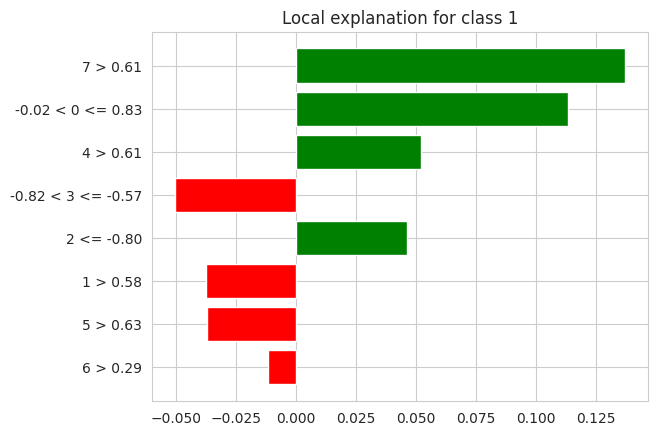

In [ ]:
# Visualize the feature importance weights for the explanation
fig = exp.as_pyplot_figure()
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* We started with data cleaning and necessary feature changes.

* After Performing EDA we devloped many meaningful insights about the data.

* We trimmed down the features based on various feature selection techniques.

* Balancing the dataset by using the SMOTE technique helped in improving the models' sensitivity, this is when compared to the performance metrics of other models on different notebooks on the same dataset

* At last we implemented 3 classification models namely logistic regression classifier, KNN classifier and SVC.

* All of the models were hyperparameter tunned and evaluated based on different evaluation techniques, and the main intention of hyperparameter tunning was to improve overall model performance with stress on reducing true negatives.

* Out of the models implemented classifier, KNN classifier and SVC showed good results and while considering overall performance SVC showed great results.

* People attaining education 1 is high followed by 2,3 and 4.

* Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.

* Around 50% of people in all education types tend to be smokers.

* Around 30% of people in all education types tend to have hypertension.

* Males have higher chance to be a smoker.

* Non-smokers tend to have a bit higher chance(37%) of hypertension issues compared to smokers(25%).

* People on bp medication tend to have hypertension issues as well.

* People on bp medication tend to have a bit higher chance to be diabetic by 9%.

* People with prevalent stroke tend to have a higher chance(72%) of hypertension issues.

* People with prevalent hypertension tend to have a bit higher chance of being diabetic.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***